# Dependencies

In [ ]:
BIGF CHANGES

In [2]:
# DEPENDENCIES
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# CSV to DFs
(load csv paths & read csv to DFs)

In [3]:
# BROAD
Mental_Disorders = Path("Resources/Mental health Depression disorder Data.csv")
Mental_Disorders_OGdf = pd.read_csv(Mental_Disorders, delimiter=',')
Gender_Depression_OGdf = pd.read_csv(Mental_Disorders, delimiter=',', header = 6469)
Suicide_rate_OGdf = pd.read_csv(Mental_Disorders, delimiter = ',', header = 54277)

GDP_HealthExp = Path("Resources/World_Bank/HealthExpGDP%.csv")
GDP_HealthExp_OGdf = pd.read_csv(GDP_HealthExp, delimiter=',')

GDP = Path("Resources/World_Bank/GDP_USD.csv")
GDP_OGdf = pd.read_csv(GDP, delimiter = ',')

Pop = Path("Resources/World_Bank/Pop.csv")
Pop_OGdf = pd.read_csv(Pop, delimiter = ',')

Urban_Pop = Path("Resources/World_Bank/Urban_Pop.csv")
Urban_Pop_OGdf = pd.read_csv(Urban_Pop, delimiter = ',')

Pop_Density = Path("Resources/World_Bank/Pop_density.csv")
Pop_Density_OGdf = pd.read_csv(Pop_Density, delimiter = ',')

Undernourishment = Path("Resources/World_Bank/Undernourishment%.csv")
Undernourishment_OGdf = pd.read_csv(Undernourishment, delimiter=',')

Life_Exp = Path("Resources/World_Bank/Life_Exp.csv")
Life_Exp_OGdf = pd.read_csv(Life_Exp, delimiter = ',')

Unemployment = Path("Resources/World_Bank/Unemployment.csv")
Unemployment_OGdf = pd.read_csv(Unemployment, delimiter = ',')

Age_Dep_Ratio = Path("Resources/World_Bank/Age_Dep_Ratio.csv")
Age_Dep_Ratio_OGdf = pd.read_csv(Age_Dep_Ratio, delimiter = ',')

Air_Poll = Path("Resources/World_Bank/Air_Poll.csv")
Air_Poll_OGdf = pd.read_csv(Air_Poll, delimiter = ',')

# NARROW
Gini = Path("Resources/World_Bank/Gini.csv")
Gini_OGdf = pd.read_csv(Gini, delimiter=',')

#Mental_Health = Path("Resources/Mental Health Dataset.csv")
#Mental_Health_df = pd.read_csv(Mental_Health)

#World_Bank = Path("Resources/2.12_Health_systems.csv")
#World_Bank_df = pd.read_csv(World_Bank)

/var/folders/m6/bhhzzj012vq18r_pf4rv2l640000gn/T/ipykernel_5020/2901924725.py:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  Mental_Disorders_OGdf = pd.read_csv(Mental_Disorders, delimiter=',')
/var/folders/m6/bhhzzj012vq18r_pf4rv2l640000gn/T/ipykernel_5020/2901924725.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  Gender_Depression_OGdf = pd.read_csv(Mental_Disorders, delimiter=',', header = 6469)


## Narrow Focus CSVs to DFs

In [81]:
Psychologists = Path("Resources/World_Health/Psychologists.csv")
Psychologists_OGdf = pd.read_csv(Psychologists, delimiter=',')
Psychologists_df_torename = Psychologists_OGdf[["Location", "Period", "Value"]]
Psychologists_df = Psychologists_df_torename.rename(columns={"Location": "Country Name", "Period": "Year", "Value": "Psychologists per 100k"})
Psychologists_df["Year"].unique() # falls within period range; assume stable throughout period.
Psychologists_df = Psychologists_df[["Country Name", "Psychologists per 100k"]]
Psychologists_df

,Country Name,Psychologists per 100k
0,Tunisia,0.009
1,Sierra Leone,0.028
2,Ethiopia,0.046
3,Iraq,0.111
4,Sri Lanka,0.246
...,...,...
115,Germany,49.555
116,Switzerland,84.137
117,Honduras,0.625
118,Mauritania,0.143


In [80]:
GPs = Path("Resources/World_Health/GPs.csv")
GPs_OGdf = pd.read_csv(GPs, delimiter=',')
GPs_df_torename = GPs_OGdf[["Location", "Period", "Value"]]
GPs_df_tofilter = GPs_df_torename.rename(columns={"Location": "Country Name", "Period": "Year", "Value": "GPs per 100k"})
GPs_df = GPs_df_tofilter.loc[
    (GPs_df_tofilter["Year"] == 2010) | 
    (GPs_df_tofilter["Year"] == 2011) | 
    (GPs_df_tofilter["Year"] == 2012) | 
    (GPs_df_tofilter["Year"] == 2013) | 
    (GPs_df_tofilter["Year"] == 2014) | 
    (GPs_df_tofilter["Year"] == 2015) | 
    (GPs_df_tofilter["Year"] == 2016) | 
    (GPs_df_tofilter["Year"] == 2017)]
GPs_df

,Country Name,Year,GPs per 100k
398,Estonia,2017,1059
399,Mexico,2017,107 566
400,Rwanda,2017,1114
401,Belgium,2017,12 992
402,Austria,2017,13 745
...,...,...,...
859,Mexico,2010,81 715
860,Israel,2010,8801
861,Azerbaijan,2010,8884
862,Zimbabwe,2010,954


# Prep DFs for Merge 
(column renames, dropna values, iloc rows, melts, column formatting)

In [88]:
# BROAD DFs
Mental_Disorders_df_torename = Mental_Disorders_OGdf.drop('index', axis=1)
Mental_Disorders_df_torowdrop = Mental_Disorders_df_torename.rename(columns={"Entity": "Country Name", "Code": "Country Code"})
Mental_Disorders_df_todropna = Mental_Disorders_df_torowdrop.iloc[0:6468]
Mental_Disorders_df = Mental_Disorders_df_todropna.dropna()
Mental_Disorders_df

Gender_Depression_df_toiloc = Gender_Depression_OGdf[['Entity', 'Code', 'Year', 'Prevalence in males (%)', 'Prevalence in females (%)']]
Gender_Depression_df_torename = Gender_Depression_df_toiloc.iloc[0:47807]
Gender_Depression_df_todropna = Gender_Depression_df_torename.rename(columns={"Entity": "Country Name", "Code": "Country Code"})
Gender_Depression_df_toformat = Gender_Depression_df_todropna.dropna()
#Gender_Depression_df_toformat["Prevalence in males (%)"] = Gender_Depression_df_toformat["Prevalence in males (%)"].map("{:.0f}".format)
#Gender_Depression_df_toformat["Prevalence in females (%)"] = Gender_Depression_df_toformat["Prevalence in females (%)"].map("{:.0f}".format)
Gender_Depression_df = Gender_Depression_df_toformat
Gender_Depression_df

Suicide_rate_df_torename = Suicide_rate_OGdf[['Entity', 'Code', 'Year', 'Suicide rate (deaths per 100,000 individuals)', 'Depressive disorder rates (number suffering per 100,000)']]
Suicide_rate_df_todropna = Suicide_rate_df_torename.rename(columns={"Entity": "Country Name", "Code": "Country Code"})
Suicide_rate_df = Suicide_rate_df_todropna.dropna()
Suicide_rate_df

GDP_HealthExp_df_tomelt = GDP_HealthExp_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
GDP_HealthExp_df_todropna = GDP_HealthExp_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name = "Year", value_name = "Percentage GDP Health Expenditure")
GDP_HealthExp_df = GDP_HealthExp_df_todropna.dropna()
GDP_HealthExp_df

GDP_df_tomelt = GDP_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
GDP_df_todropna = GDP_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name = "Year", value_name = "GDP (Current USD)")
GDP_df_toformat = GDP_df_todropna.dropna()
GDP_df_toformat["GDP (Current USD)"] = GDP_df_toformat["GDP (Current USD)"].map("{:.0f}".format)
#GDP_df_toformat.loc[:, "GDP (Current USD)"] = GDP_df_toformat["GDP (Current USD)"].map("{:.2f}".format)
GDP_df = GDP_df_toformat
GDP_df

Pop_df_tomelt = Pop_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Pop_df_todtopna = Pop_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name = "Year", value_name = "Population")
Pop_df_toformat = Pop_df_todtopna.dropna()
Pop_df_toformat["Population"] = Pop_df_toformat["Population"].map("{:.0f}".format)
Pop_df = Pop_df_toformat
Pop_df

Urban_Pop_df_tomelt = Urban_Pop_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Urban_Pop_df_todropna = Urban_Pop_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name = "Year", value_name = "Urban Population")
Urban_Pop_df_toformat = Urban_Pop_df_todropna.dropna()
Urban_Pop_df_toformat["Urban Population"] = Urban_Pop_df_toformat["Urban Population"].map("{:.0f}".format)
Urban_Pop_df = Urban_Pop_df_toformat
Urban_Pop_df

Pop_Density_df_tomelt = Pop_Density_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Pop_Density_df_todropna = Pop_Density_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Population Density")
Pop_Density_df_toformat = Pop_Density_df_todropna.dropna()
Pop_Density_df_toformat["Population Density"] = Pop_Density_df_toformat["Population Density"].map("{:.0f}".format)
Pop_Density_df = Pop_Density_df_toformat
Pop_Density_df

Undernourishment_df_tomelt = Undernourishment_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Undernourishment_df_todtopna = Undernourishment_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Undernourishment (%)")
Undernourishment_df = Undernourishment_df_todtopna.dropna()
Undernourishment_df

Life_Exp_df_tomelt = Life_Exp_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Life_Exp_df_todropna = Life_Exp_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Life Expectancy")
Life_Exp_df_toformat = Life_Exp_df_todropna.dropna()
Life_Exp_df_toformat["Life Expectancy"] = Life_Exp_df_toformat["Life Expectancy"].map("{:.0f}".format)
Life_Exp_df = Life_Exp_df_toformat
Life_Exp_df

Unemployment_df_tomelt = Unemployment_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Unemployment_df_todtopna = Unemployment_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Unemployment (%)")
Unemployment_df = Unemployment_df_todtopna.dropna()
Unemployment_df

Age_Dep_Ratio_df_tomelt = Age_Dep_Ratio_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Age_Dep_Ratio_df_todtopna = Age_Dep_Ratio_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Age Dependency Ratio (%)")
Age_Dep_Ratio_df = Age_Dep_Ratio_df_todtopna.dropna()
Age_Dep_Ratio_df

Air_Poll_df_tomelt = Air_Poll_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Air_Poll_df_todtopna = Air_Poll_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="PM2.5 Air Pollution")
Air_Poll_df_toformat = Air_Poll_df_todtopna.dropna()
Air_Poll_df_toformat["PM2.5 Air Pollution"] = Air_Poll_df_toformat["PM2.5 Air Pollution"].map("{:.2f}".format)
Air_Poll_df = Air_Poll_df_toformat
Air_Poll_df


# NARROW DFs
Gini_df_tomelt = Gini_OGdf[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]
Gini_df_todtopna = Gini_df_tomelt.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Gini Index")
Gini_df = Gini_df_todtopna.dropna()
Gini_df

/var/folders/m6/bhhzzj012vq18r_pf4rv2l640000gn/T/ipykernel_5020/3023035308.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_df_toformat["GDP (Current USD)"] = GDP_df_toformat["GDP (Current USD)"].map("{:.0f}".format)
/var/folders/m6/bhhzzj012vq18r_pf4rv2l640000gn/T/ipykernel_5020/3023035308.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pop_df_toformat["Population"] = Pop_df_toformat["Population"].map("{:.0f}".format)
/var/folders/m6/bhhzzj012vq18r_pf4rv2l640000gn/T/ipykernel_5020/3023035308.p

,Country Name,Country Code,Year,Gini Index
9,Argentina,ARG,2010,43.7
10,Armenia,ARM,2010,30.0
13,Australia,AUS,2010,34.7
14,Austria,AUT,2010,30.3
17,Belgium,BEL,2010,28.4
...,...,...,...,...
2110,Ukraine,UKR,2017,26.0
2112,Uruguay,URY,2017,39.5
2113,United States,USA,2017,41.2
2123,Kosovo,XKX,2017,29.0


# Merge
on = ['Country Name', 'Country Code', 'Year'], how = 'inner'

In [6]:
# MERGING
HealthExp_Disorders_df = pd.merge(GDP_HealthExp_df, Mental_Disorders_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_df = pd.merge(GDP_df, HealthExp_Disorders_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_Gender_df = pd.merge(GDP_HealthExp_Disorders_df, Gender_Depression_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_UN_df = pd.merge(GDP_HealthExp_Disorders_Gender_df, Undernourishment_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_UNemp_df = pd.merge(GDP_HealthExp_Disorders_UN_df, Unemployment_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_UNemp_AgeDep_df = pd.merge(GDP_HealthExp_Disorders_UNemp_df, Age_Dep_Ratio_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_Pop_df = pd.merge(GDP_HealthExp_Disorders_UNemp_AgeDep_df, Pop_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_PopUrb_df= pd.merge(GDP_HealthExp_Disorders_Pop_df, Urban_Pop_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_Pops_df = pd.merge(GDP_HealthExp_Disorders_PopUrb_df, Pop_Density_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_Pops_AirP_df = pd.merge(GDP_HealthExp_Disorders_Pops_df, Air_Poll_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
#GDP_HealthExp_Disorders_Pops_Gini_df = pd.merge(GDP_HealthExp_Disorders_Pops_df, Gini_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_Pops_le_df = pd.merge(GDP_HealthExp_Disorders_Pops_AirP_df, Life_Exp_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')
GDP_HealthExp_Disorders_Pops_Suicide_df = pd.merge(GDP_HealthExp_Disorders_Pops_le_df, Suicide_rate_df, on = ['Country Name', 'Country Code', 'Year'], how = 'inner')

Macro_Disorder_df = GDP_HealthExp_Disorders_Pops_Suicide_df.copy()
Macro_Disorder_df

,Country Name,Country Code,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),...,Undernourishment (%),Unemployment (%),Age Dependency Ratio (%),Population,Urban Population,Population Density,PM2.5 Air Pollution,Life Expectancy,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)"
0,Afghanistan,AFG,2010,15856668556,8.569672,0.16513,0.705313,0.097327,4.862777,2.571349,...,20.5,7.914,105.433416,28189672,6691382,43,51.82,61,9.875393,4053.953769
1,Angola,AGO,2010,83799474070,2.695100,0.170158,0.622503,0.156364,3.277828,0.503415,...,22.6,16.598,93.586571,23364185,13967811,19,28.63,57,13.177998,4098.150892
2,Albania,ALB,2010,11926926616,6.236677,0.199308,0.703064,0.160337,3.391246,0.500270,...,5.4,14.086,48.352701,2913021,1519519,106,21.63,78,5.257754,2106.380192
3,United Arab Emirates,ARE,2010,300189052689,3.878731,0.213138,0.80147,0.260129,4.200126,3.059998,...,7.4,2.789,16.172016,8481771,7132067,119,43.53,78,5.149191,2711.270791
4,Argentina,ARG,2010,423627422092,9.445464,0.197541,0.771084,0.381185,6.268718,0.955035,...,3.5,7.714,56.625613,40788453,37055902,15,13.74,76,10.783922,3363.831257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,Vanuatu,VUT,2017,880061834,2.762855,0.214734,0.427419,0.106462,3.218816,0.698906,...,10.4,5.288,77.051180,290239,73033,24,12.89,70,17.699601,3069.681955
1106,Samoa,WSM,2017,884844384,5.161202,0.234876,0.460366,0.126132,3.255973,0.844905,...,7.9,9.400,75.551478,207630,38312,75,10.90,73,10.001743,2951.095793
1107,South Africa,ZAF,2017,381448814653,7.977112,0.181937,0.636613,0.214718,3.992830,0.921499,...,5.7,23.992,52.261300,56641209,37298236,47,28.86,65,11.150289,3613.578944
1108,Zambia,ZMB,2017,25873601261,4.781562,0.165866,0.605972,0.142768,3.599714,0.515972,...,29.4,8.518,87.051023,17298054,7434012,23,26.18,62,13.060061,3577.959846


In [7]:
## Merged DF Country Count
len(Macro_Disorder_df['Country Name'].unique())

140

In [8]:
# CASTING in Merged DF
Macro_Disorder_df = Macro_Disorder_df.astype({"Population Density": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Urban Population": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Population": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Eating disorders (%)": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Bipolar disorder (%)": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Schizophrenia (%)": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"GDP (Current USD)": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Prevalence in males (%)": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Prevalence in females (%)": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Year": int}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Suicide rate (deaths per 100,000 individuals)": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"Life Expectancy": float}, errors = 'raise')
Macro_Disorder_df = Macro_Disorder_df.astype({"PM2.5 Air Pollution": float}, errors = 'raise')

In [9]:
## Merged DF column dtypes
Macro_Disorder_df.dtypes

Country Name                                                 object
Country Code                                                 object
Year                                                          int64
GDP (Current USD)                                           float64
Percentage GDP Health Expenditure                           float64
Schizophrenia (%)                                           float64
Bipolar disorder (%)                                        float64
Eating disorders (%)                                        float64
Anxiety disorders (%)                                       float64
Drug use disorders (%)                                      float64
Depression (%)                                              float64
Alcohol use disorders (%)                                   float64
Prevalence in males (%)                                     float64
Prevalence in females (%)                                   float64
Undernourishment (%)                            

In [10]:
## Merged DF columns
Macro_Disorder_df.columns

Index(['Country Name', 'Country Code', 'Year', 'GDP (Current USD)',
       'Percentage GDP Health Expenditure', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Prevalence in males (%)', 'Prevalence in females (%)',
       'Undernourishment (%)', 'Unemployment (%)', 'Age Dependency Ratio (%)',
       'Population', 'Urban Population', 'Population Density',
       'PM2.5 Air Pollution', 'Life Expectancy',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)'],
      dtype='object')

# Create Extended Data Frame to perform column calculations
(Macro_Disorder_df >>> Macro_Disorder_ext_df)

In [11]:
Macro_Disorder_ext_df = Macro_Disorder_df.copy()

# COLUMN CALCULATIONS
Macro_Disorder_ext_df['GDP per Capita (USD)'] = Macro_Disorder_ext_df['GDP (Current USD)'] / Macro_Disorder_ext_df['Population']
Macro_Disorder_ext_df['Health Expenditure (USD)'] = Macro_Disorder_ext_df['GDP (Current USD)'] * Macro_Disorder_ext_df['Percentage GDP Health Expenditure'] / 100

Macro_Disorder_ext_df['Schizophrenia (#)'] = Macro_Disorder_ext_df['Schizophrenia (%)'] * Macro_Disorder_ext_df['Population'] / 100
Macro_Disorder_ext_df['Bipolar disorder (#)'] = Macro_Disorder_ext_df['Bipolar disorder (%)'] * Macro_Disorder_ext_df['Population'] / 100
Macro_Disorder_ext_df['Eating disorders (#)'] = Macro_Disorder_ext_df['Eating disorders (%)'] * Macro_Disorder_ext_df['Population'] / 100
Macro_Disorder_ext_df['Anxiety disorders (#)'] = Macro_Disorder_ext_df['Anxiety disorders (%)'] * Macro_Disorder_ext_df['Population'] / 100
Macro_Disorder_ext_df['Drug use disorders (#)'] = Macro_Disorder_ext_df['Drug use disorders (%)'] * Macro_Disorder_ext_df['Population'] / 100
Macro_Disorder_ext_df['Depression (#)'] = Macro_Disorder_ext_df['Depression (%)'] * Macro_Disorder_ext_df['Population'] / 100
Macro_Disorder_ext_df['Alcohol use disorders (#)'] = Macro_Disorder_ext_df['Alcohol use disorders (%)'] * Macro_Disorder_ext_df['Population'] / 100

In [12]:
len(Macro_Disorder_ext_df.columns)

33

In [13]:
Macro_Disorder_ext_df.columns

Index(['Country Name', 'Country Code', 'Year', 'GDP (Current USD)',
       'Percentage GDP Health Expenditure', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Prevalence in males (%)', 'Prevalence in females (%)',
       'Undernourishment (%)', 'Unemployment (%)', 'Age Dependency Ratio (%)',
       'Population', 'Urban Population', 'Population Density',
       'PM2.5 Air Pollution', 'Life Expectancy',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'GDP per Capita (USD)', 'Health Expenditure (USD)', 'Schizophrenia (#)',
       'Bipolar disorder (#)', 'Eating disorders (#)', 'Anxiety disorders (#)',
       'Drug use disorders (#)', 'Depression (#)',
       'Alcohol use disorders (#)'],
      dtype='object')

### Create CSV of Macro_Disorder_ext_df

In [14]:
Macro_Disorder_ext_df.to_csv("Output_Data/Macro_Disorder_ext.csv")

# Create Narrow Focus Data Frames  
refer to 'CSV to DFs' > 'Narrow Focus CSVs to DFs'

In [15]:
# Micro_Disorder_df -- copy
Micro_Disorder_df = Macro_Disorder_ext_df.copy()

In [16]:
Micro_Psychologists_togroupby = pd.merge(Micro_Disorder_df, Psychologists_df, on="Country Name", how='inner')
Micro_Psychologists = Micro_Psychologists_togroupby.drop("Country Code", axis=1).groupby("Country Name").mean()
Micro_Psychologists

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#),Psychologists per 100k
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2013.5,1.877711e+10,9.738543,0.165654,0.706685,0.102210,4.871668,2.548328,4.133733,0.662114,...,588.247075,1.828026e+09,53058.405440,226334.757059,32812.741306,1.560283e+06,815374.655209,1.323854e+06,212033.321457,0.296
Albania,2013.5,1.242621e+10,6.383303,0.200223,0.703828,0.167811,3.389137,0.509068,2.204248,1.845656,...,4297.338744,7.930106e+08,5789.644509,20352.062007,4851.867857,9.800170e+04,14719.615742,6.373856e+04,53369.528321,1.231
Angola,2013.5,1.011120e+11,2.627024,0.171624,0.623360,0.165593,3.287638,0.509920,4.157218,1.384664,...,3852.300309,2.632308e+09,45838.409438,166430.568107,44338.046554,8.778503e+05,136257.337609,1.109897e+06,369594.755218,0.179
Argentina,2013.5,5.467528e+11,9.807485,0.197834,0.772093,0.392787,6.275375,0.978033,3.654190,1.827401,...,12865.597637,5.376711e+10,83938.928326,327590.653135,166732.014334,2.662560e+06,415149.894735,1.550459e+06,775274.564382,222.572
Armenia,2013.5,1.067245e+10,9.835000,0.195925,0.716384,0.162072,2.589292,0.490042,2.732140,1.983413,...,3685.987861,1.052211e+09,5676.004080,20754.668877,4694.326011,7.501570e+04,14194.624232,7.915076e+04,57465.169323,0.788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,2013.5,3.737504e+11,3.661436,0.212233,0.803678,0.259951,4.224241,3.007827,2.860571,0.763392,...,42512.109886,1.365521e+10,18645.592821,70615.442769,22840.696996,3.711888e+05,264182.372368,2.513438e+05,67064.488320,0.765
Uzbekistan,2013.5,7.073790e+10,5.070000,0.186496,0.667897,0.145255,2.553654,0.474298,2.884854,1.944910,...,2310.586715,3.559215e+09,56945.257164,203896.080832,44407.674440,7.795925e+05,144842.263832,8.806522e+05,593225.381449,0.090
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,2859.447517,2.763240e+07,574.086043,1140.959488,281.415899,8.592229e+03,1827.597293,8.387857e+03,3232.364360,0.756


In [95]:
Micro_GPs_todrop = pd.merge(Micro_Disorder_df, GPs_df, on = "Country Name", how = 'inner')
Micro_GPs_df = Micro_GPs_todrop.drop("Country Code", axis=1)
Micro_GPs_df['GPs per 100k'] = Micro_GPs_df['GPs per 100k'].str.replace(" ", "")
Micro_GPs_df_togroup = Micro_GPs_df.astype({"GPs per 100k": float}, errors="raise")
Micro_GPs = Micro_GPs_df_togroup.groupby("Country Name").mean()
Micro_GPs

,Year_x,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#),Year_y,GPs per 100k
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,2013.5,1.242621e+10,6.383303,0.200223,0.703828,0.167811,3.389137,0.509068,2.204248,1.845656,...,7.930106e+08,5789.644509,20352.062007,4851.867857,9.800170e+04,14719.615742,6.373856e+04,5.336953e+04,2011.5,1596.250
Armenia,2013.5,1.067245e+10,9.835000,0.195925,0.716384,0.162072,2.589292,0.490042,2.732140,1.983413,...,1.052211e+09,5676.004080,20754.668877,4694.326011,7.501570e+04,14194.624232,7.915076e+04,5.746517e+04,2013.5,1519.875
Australia,2013.5,1.378422e+12,9.326795,0.364632,1.146493,0.938357,6.604777,2.117433,4.738653,1.506636,...,1.283352e+11,84911.184275,266981.194038,218573.301037,1.538045e+06,494005.570082,1.102980e+06,3.509128e+05,2014.5,37027.000
Austria,2013.5,4.126509e+11,10.276250,0.256487,0.939852,0.672592,5.347553,0.911160,3.272791,1.905054,...,4.240019e+10,21926.191348,80343.306050,57499.967466,4.571304e+05,77885.054088,2.797607e+05,1.627872e+05,2013.5,13773.375
Azerbaijan,2013.5,5.871903e+10,3.507500,0.197954,0.688306,0.196022,2.576636,0.476635,2.563257,2.314288,...,2.006969e+09,18744.346858,65164.896584,18576.661354,2.439420e+05,45141.524750,2.427062e+05,2.190972e+05,2012.0,8674.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkmenistan,2013.5,3.494974e+10,4.363274,0.193885,0.666340,0.185643,2.559913,0.514930,2.822227,2.730036,...,1.555889e+09,10890.219445,37413.212142,10445.467734,1.437289e+05,28916.053014,1.584426e+05,1.529717e+05,2013.5,4312.000
Ukraine,2013.5,1.392018e+11,7.207500,0.190648,0.687080,0.170071,2.940969,0.687299,4.113148,4.875319,...,9.933557e+09,86510.127162,311777.366400,77166.314469,1.334530e+06,311828.715267,1.866536e+06,2.212605e+06,2012.0,16548.200
Uruguay,2013.5,5.619075e+10,8.238663,0.197961,0.780008,0.383603,6.303125,0.939835,3.565693,1.169565,...,4.643095e+09,6705.342243,26420.160405,12996.330382,2.134973e+05,31831.007906,1.207820e+05,3.961878e+04,2016.0,5021.000


# Quick Anlayses

### Sorted Mean Disorder Rates by Country

In [17]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Depression (%)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
Lesotho,2013.5,2.360112e+09,9.608697,0.159894,0.605449,0.131378,3.474355,0.764170,5.623608,1.671783,...,5489.031156,1130.719446,2.271020e+08,3.341672e+03,1.265212e+04,2.747022e+03,7.260438e+04,1.597071e+04,1.175196e+05,3.493058e+04
Morocco,2013.5,1.116601e+11,5.255282,0.185472,0.780434,0.168759,4.983991,1.603445,5.579045,0.573709,...,5360.326634,3282.423581,5.864260e+09,6.308796e+04,2.654430e+05,5.744043e+04,1.695122e+06,5.456081e+05,1.896555e+06,1.951372e+05
Uganda,2013.5,2.946436e+10,5.595820,0.159126,0.608530,0.115132,3.501130,0.537489,5.052701,1.290151,...,4989.112273,819.981795,1.635564e+09,5.727838e+04,2.190046e+05,4.149830e+04,1.260244e+06,1.934878e+05,1.815970e+06,4.643421e+05
Finland,2013.5,2.575622e+11,9.462500,0.264402,1.004707,0.592246,3.749232,0.912382,4.895461,2.742668,...,4501.477184,47326.228856,2.437974e+10,1.439127e+04,5.469292e+04,3.224029e+04,2.040953e+05,4.967848e+04,2.664618e+05,1.492659e+05
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Myanmar,2013.5,6.052697e+10,3.695000,0.210185,0.508917,0.115698,3.302902,0.569866,2.273375,0.868910,...,2217.194939,1189.372536,2.279380e+09,1.069000e+05,2.587872e+05,5.889389e+04,1.679552e+06,2.898087e+05,1.156132e+06,4.418418e+05
Poland,2013.5,5.027401e+11,6.438750,0.206156,0.710718,0.220183,3.462014,0.802974,2.269322,2.028608,...,2133.027893,13223.256168,3.236588e+10,7.837837e+04,2.702080e+05,8.370939e+04,1.316225e+06,3.052859e+05,8.627784e+05,7.712544e+05
Peru,2013.5,1.883263e+11,4.812483,0.202113,0.890134,0.363514,4.259384,0.586798,2.266113,1.446616,...,2183.184205,6210.258056,9.077679e+09,6.122092e+04,2.696027e+05,1.101335e+05,1.290068e+06,1.776930e+05,6.863800e+05,4.380509e+05


In [18]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Drug use disorders (%)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
United Arab Emirates,2013.5,3.737504e+11,3.661436,0.212233,0.803678,0.259951,4.224241,3.007827,2.860571,0.763392,...,2712.904069,42512.109886,1.365521e+10,1.864559e+04,7.061544e+04,2.284070e+04,3.711888e+05,2.641824e+05,2.513438e+05,6.706449e+04
Afghanistan,2013.5,1.877711e+10,9.738543,0.165654,0.706685,0.102210,4.871668,2.548328,4.133733,0.662114,...,4048.679358,588.247075,1.828026e+09,5.305841e+04,2.263348e+05,3.281274e+04,1.560283e+06,8.153747e+05,1.323854e+06,2.120333e+05
Libya,2010.5,6.177504e+10,3.649832,0.199054,0.804959,0.247465,4.965422,2.495451,3.783189,0.687114,...,3598.269890,9697.749356,2.204455e+09,1.262033e+04,5.103480e+04,1.569006e+04,3.148073e+05,1.581975e+05,2.398564e+05,4.356394e+04
Canada,2013.5,1.703144e+12,10.613959,0.314629,0.714746,0.473224,5.168592,2.215271,3.939233,1.602571,...,3587.189870,48386.464477,1.805056e+11,1.108851e+05,2.518962e+05,1.667907e+05,1.821542e+06,7.809234e+05,1.388458e+06,5.648504e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chad,2013.5,1.164383e+10,4.258966,0.167147,0.625581,0.119013,2.881160,0.446516,3.927036,0.943801,...,3886.755881,872.730933,4.933345e+08,2.250796e+04,8.422535e+04,1.604530e+04,3.879025e+05,6.017746e+04,5.283484e+05,1.270609e+05
Guinea,2013.5,8.268321e+09,4.261464,0.165426,0.628627,0.108949,2.894611,0.443142,3.546614,0.940663,...,3512.411693,734.047033,3.561172e+08,1.856699e+04,7.054703e+04,1.223847e+04,3.248468e+05,4.977394e+04,3.980402e+05,1.055805e+05
Mali,2013.5,1.327881e+10,4.056776,0.167067,0.627895,0.114439,2.882351,0.435812,2.958872,0.903738,...,2928.852401,764.796096,5.363187e+08,2.898380e+04,1.089186e+05,1.986759e+04,5.000012e+05,7.566744e+04,5.135581e+05,1.567661e+05


In [19]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Alcohol use disorders (%)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
Belarus,2013.5,6.224053e+10,5.576250,0.196351,0.698998,0.202387,2.946223,0.783977,4.055568,5.430544,...,3789.769589,6580.912826,3.456024e+09,18573.132447,66119.489977,19144.012069,2.786886e+05,7.415768e+04,3.836244e+05,5.136850e+05
Estonia,2013.5,2.392430e+10,6.418904,0.202972,0.708207,0.250890,2.965800,1.130113,3.921010,4.907905,...,3627.783437,18125.783662,1.535417e+09,2679.890780,9350.750383,3312.552216,3.915879e+04,1.492127e+04,5.177364e+04,6.480549e+04
Ukraine,2013.5,1.392018e+11,7.207500,0.190648,0.687080,0.170071,2.940969,0.687299,4.113148,4.875319,...,3872.668827,3063.806466,9.933557e+09,86510.127162,311777.366400,77166.314469,1.334530e+06,3.118287e+05,1.866536e+06,2.212605e+06
Lithuania,2013.5,4.386123e+10,6.438750,0.198952,0.697681,0.223410,2.928479,0.597525,4.174476,4.509327,...,3920.676568,14896.315198,2.818516e+09,5869.234612,20584.565043,6586.137131,8.640363e+04,1.761591e+04,1.231899e+05,1.330814e+05
Latvia,2013.5,2.837783e+10,5.731250,0.198503,0.696002,0.219414,2.944052,1.032556,3.496659,4.468094,...,3265.318154,14146.312614,1.623303e+09,3988.913487,13987.193546,4407.339025,5.916540e+04,2.074758e+04,7.027204e+04,8.980642e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malaysia,2013.5,3.063094e+11,3.549732,0.250205,0.577872,0.193819,4.425950,0.660110,3.437114,0.644127,...,3220.315217,10087.406485,1.090496e+10,75978.311798,175445.584043,58893.974475,1.343183e+06,2.004901e+05,1.043964e+06,1.955574e+05
Morocco,2013.5,1.116601e+11,5.255282,0.185472,0.780434,0.168759,4.983991,1.603445,5.579045,0.573709,...,5360.326634,3282.423581,5.864260e+09,63087.955964,265442.978764,57440.434010,1.695122e+06,5.456081e+05,1.896555e+06,1.951372e+05
Japan,2013.5,5.344169e+12,10.461250,0.301147,0.688160,0.458133,3.560696,0.898137,3.221601,0.573446,...,2898.432240,41927.215530,5.579178e+11,383761.047974,876923.688795,583806.243489,4.537384e+06,1.144454e+06,4.105050e+06,7.307240e+05


In [20]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Anxiety disorders (%)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
New Zealand,2013.5,1.821050e+11,9.377544,0.341035,1.206371,0.666625,8.537551,2.039562,3.973218,1.985941,...,3530.313359,40152.331023,1.705010e+10,1.544825e+04,5.464624e+04,3.020336e+04,3.867386e+05,9.239531e+04,1.799727e+05,9.016646e+04
Norway,2013.5,4.542253e+11,9.411250,0.211370,0.856655,0.570766,7.603229,0.867249,3.652384,1.427157,...,3358.983735,89323.830236,4.239259e+10,1.077412e+04,4.366572e+04,2.909368e+04,3.875403e+05,4.417429e+04,1.862473e+05,7.273997e+04
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
France,2013.5,2.671145e+12,11.364606,0.256829,0.960624,0.565579,6.645552,1.209217,4.314880,1.469359,...,3889.550780,40445.144411,3.035214e+11,1.696787e+05,6.346536e+05,3.736999e+05,4.390497e+06,7.988254e+05,2.850551e+06,9.706188e+05
Australia,2013.5,1.378422e+12,9.326795,0.364632,1.146493,0.938357,6.604777,2.117433,4.738653,1.506636,...,4223.273667,59277.951124,1.283352e+11,8.491118e+04,2.669812e+05,2.185733e+05,1.538045e+06,4.940056e+05,1.102980e+06,3.509128e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkmenistan,2013.5,3.494974e+10,4.363274,0.193885,0.666340,0.185643,2.559913,0.514930,2.822227,2.730036,...,2689.363182,6205.414048,1.555889e+09,1.089022e+04,3.741321e+04,1.044547e+04,1.437289e+05,2.891605e+04,1.584426e+05,1.529717e+05
Uzbekistan,2013.5,7.073790e+10,5.070000,0.186496,0.667897,0.145255,2.553654,0.474298,2.884854,1.944910,...,2775.791232,2310.586715,3.559215e+09,5.694526e+04,2.038961e+05,4.440767e+04,7.795925e+05,1.448423e+05,8.806522e+05,5.932254e+05
Mongolia,2013.5,1.112285e+10,4.079246,0.188450,0.653471,0.168233,2.540770,0.526214,3.558683,3.473308,...,3408.485676,3851.116610,4.559613e+08,5.437925e+03,1.885124e+04,4.862868e+03,7.331756e+04,1.518331e+04,1.026323e+05,1.002013e+05


In [21]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Schizophrenia (%)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
Netherlands,2013.5,8.430523e+11,10.321250,0.368098,0.947372,0.460789,6.561230,0.951262,4.031707,0.745190,...,3676.427949,50038.420760,8.705256e+10,6.203158e+04,1.596730e+05,7.767111e+04,1.105903e+06,1.603619e+05,6.795109e+05,1.256250e+05
Australia,2013.5,1.378422e+12,9.326795,0.364632,1.146493,0.938357,6.604777,2.117433,4.738653,1.506636,...,4223.273667,59277.951124,1.283352e+11,8.491118e+04,2.669812e+05,2.185733e+05,1.538045e+06,4.940056e+05,1.102980e+06,3.509128e+05
New Zealand,2013.5,1.821050e+11,9.377544,0.341035,1.206371,0.666625,8.537551,2.039562,3.973218,1.985941,...,3530.313359,40152.331023,1.705010e+10,1.544825e+04,5.464624e+04,3.020336e+04,3.867386e+05,9.239531e+04,1.799727e+05,9.016646e+04
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,2013.5,2.946436e+10,5.595820,0.159126,0.608530,0.115132,3.501130,0.537489,5.052701,1.290151,...,4989.112273,819.981795,1.635564e+09,5.727838e+04,2.190046e+05,4.149830e+04,1.260244e+06,1.934878e+05,1.815970e+06,4.643421e+05
Zimbabwe,2013.5,1.749271e+10,7.749776,0.156167,0.608620,0.118757,3.094277,0.766560,3.140522,1.514469,...,3057.056957,1268.784519,1.333562e+09,2.145901e+04,8.361897e+04,1.633064e+04,4.251366e+05,1.053415e+05,4.316194e+05,2.080444e+05
Mozambique,2013.5,1.492979e+10,6.247805,0.155110,0.609605,0.098899,3.644036,0.519453,3.886165,1.692379,...,3829.203093,583.344671,9.283446e+08,3.989969e+04,1.567787e+05,2.548350e+04,9.373756e+05,1.336776e+05,9.995043e+05,4.353749e+05


In [22]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Bipolar disorder (%)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
New Zealand,2013.5,1.821050e+11,9.377544,0.341035,1.206371,0.666625,8.537551,2.039562,3.973218,1.985941,...,3530.313359,40152.331023,1.705010e+10,1.544825e+04,5.464624e+04,3.020336e+04,3.867386e+05,9.239531e+04,1.799727e+05,9.016646e+04
Australia,2013.5,1.378422e+12,9.326795,0.364632,1.146493,0.938357,6.604777,2.117433,4.738653,1.506636,...,4223.273667,59277.951124,1.283352e+11,8.491118e+04,2.669812e+05,2.185733e+05,1.538045e+06,4.940056e+05,1.102980e+06,3.509128e+05
Brazil,2013.5,2.235063e+12,8.424043,0.204985,1.106712,0.270179,6.263148,1.047308,3.373768,2.699771,...,3229.418622,11058.500273,1.867608e+11,4.151737e+05,2.241451e+06,5.473838e+05,1.268058e+07,2.121516e+06,6.830304e+06,5.467555e+06
United Kingdom,2013.5,2.750388e+12,9.832774,0.256563,1.085697,0.542064,4.660086,1.716030,4.124592,1.911949,...,3774.543605,42699.200249,2.704262e+11,1.652774e+05,6.992528e+05,3.491306e+05,3.001277e+06,1.104884e+06,2.656435e+06,1.231361e+06
Paraguay,2013.5,3.555830e+10,6.310921,0.200901,1.074124,0.229334,6.007477,0.531825,2.942449,2.342874,...,2832.563607,5864.480900,2.256123e+09,1.216439e+04,6.502991e+04,1.389480e+04,3.637054e+05,3.219402e+04,1.781591e+05,1.418882e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fiji,2013.5,4.363105e+09,3.273190,0.237651,0.451486,0.143590,3.272276,0.750535,3.178043,1.102947,...,3083.046248,4772.563202,1.426853e+08,2.171021e+03,4.124462e+03,1.311831e+03,2.989328e+04,6.856506e+03,2.903208e+04,1.007586e+04
Solomon Islands,2013.5,1.240740e+09,4.628046,0.209428,0.427262,0.091229,3.207645,0.691640,3.169442,1.136224,...,3122.976771,2091.169934,5.713998e+07,1.237408e+03,2.524147e+03,5.395427e+02,1.895079e+04,4.088198e+03,1.872063e+04,6.712200e+03
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,3089.532503,2859.447517,2.763240e+07,5.740860e+02,1.140959e+03,2.814159e+02,8.592229e+03,1.827597e+03,8.387857e+03,3.232364e+03


In [23]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Eating disorders (%)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
Australia,2013.5,1.378422e+12,9.326795,0.364632,1.146493,0.938357,6.604777,2.117433,4.738653,1.506636,...,4223.273667,59277.951124,1.283352e+11,84911.184275,266981.194038,218573.301037,1.538045e+06,494005.570082,1.102980e+06,350912.789831
Luxembourg,2013.5,6.246192e+10,5.457500,0.263253,0.934343,0.735785,5.319169,0.945731,3.621437,1.368974,...,3331.782688,113591.135957,3.396967e+09,1449.230505,5143.437129,4051.014647,2.928042e+04,5203.825286,1.993383e+04,7533.285732
Spain,2013.5,1.337241e+12,9.075520,0.280560,0.976727,0.728582,5.276022,1.434022,3.490751,0.897441,...,3185.815404,28700.125316,1.213940e+11,130711.326028,455051.802889,339439.230549,2.458068e+06,668090.009862,1.626305e+06,418116.253953
Austria,2013.5,4.126509e+11,10.276250,0.256487,0.939852,0.672592,5.347553,0.911160,3.272791,1.905054,...,3005.089420,48295.127939,4.240019e+10,21926.191348,80343.306050,57499.967466,4.571304e+05,77885.054088,2.797607e+05,162787.181049
New Zealand,2013.5,1.821050e+11,9.377544,0.341035,1.206371,0.666625,8.537551,2.039562,3.973218,1.985941,...,3530.313359,40152.331023,1.705010e+10,15448.245982,54646.241020,30203.358380,3.867386e+05,92395.308544,1.799727e+05,90166.459947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malawi,2013.5,9.181932e+09,6.693636,0.153874,0.604252,0.098740,3.627612,0.502463,3.374782,1.609120,...,3312.906444,569.307896,6.046772e+08,25042.291476,98334.410819,16079.009877,5.904829e+05,81798.674691,5.495240e+05,261805.963284
Niger,2013.5,9.800841e+09,4.814706,0.162934,0.630350,0.092938,2.883563,0.453464,3.447353,0.909325,...,3412.460457,513.233202,4.720518e+08,31108.221873,120327.096879,17770.125815,5.504591e+05,86650.133145,6.581496e+05,173586.238726
Solomon Islands,2013.5,1.240740e+09,4.628046,0.209428,0.427262,0.091229,3.207645,0.691640,3.169442,1.136224,...,3122.976771,2091.169934,5.713998e+07,1237.407691,2524.147385,539.542682,1.895079e+04,4088.197877,1.872063e+04,6712.200050


### Sorted Mean Disorder Numbers by Country

In [24]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Depression (#)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
India,2013.5,2.034002e+12,3.407500,0.261514,0.555935,0.146703,3.292028,0.512375,3.519355,1.149992,...,3460.609565,1561.825028,6.904325e+10,3.394645e+06,7.218256e+06,1.907310e+06,4.274406e+07,6.655644e+06,4.569380e+07,1.492206e+07
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
Nigeria,2013.5,4.516438e+11,3.465446,0.180741,0.642524,0.156859,2.909322,0.454845,4.117378,0.961843,...,4063.440656,2557.117107,1.562123e+10,3.201859e+05,1.138018e+06,2.783199e+05,5.152905e+06,8.059223e+05,7.281066e+06,1.703667e+06
Brazil,2013.5,2.235063e+12,8.424043,0.204985,1.106712,0.270179,6.263148,1.047308,3.373768,2.699771,...,3229.418622,11058.500273,1.867608e+11,4.151737e+05,2.241451e+06,5.473838e+05,1.268058e+07,2.121516e+06,6.830304e+06,5.467555e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belize,2013.5,2.038282e+09,4.595085,0.194571,0.880364,0.255608,4.557809,0.831608,2.838086,1.766149,...,2727.326827,5837.361382,9.384594e+07,6.780242e+02,3.067772e+03,8.910494e+02,1.588286e+04,2.898057e+03,9.889249e+03,6.155853e+03
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,3089.532503,2859.447517,2.763240e+07,5.740860e+02,1.140959e+03,2.814159e+02,8.592229e+03,1.827597e+03,8.387857e+03,3.232364e+03
Barbados,2013.5,4.726552e+09,7.016591,0.230130,0.919692,0.324001,4.664651,0.844089,2.752176,1.590162,...,2605.323089,17056.346071,3.314429e+08,6.376469e+02,2.548320e+03,8.977272e+02,1.292498e+04,2.338805e+03,7.625932e+03,4.405995e+03


In [25]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Drug use disorders (#)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
India,2013.5,2.034002e+12,3.407500,0.261514,0.555935,0.146703,3.292028,0.512375,3.519355,1.149992,...,3460.609565,1561.825028,6.904325e+10,3.394645e+06,7.218256e+06,1.907310e+06,4.274406e+07,6.655644e+06,4.569380e+07,1.492206e+07
Brazil,2013.5,2.235063e+12,8.424043,0.204985,1.106712,0.270179,6.263148,1.047308,3.373768,2.699771,...,3229.418622,11058.500273,1.867608e+11,4.151737e+05,2.241451e+06,5.473838e+05,1.268058e+07,2.121516e+06,6.830304e+06,5.467555e+06
Indonesia,2013.5,8.972028e+11,2.922273,0.227120,0.539603,0.138858,3.274802,0.576971,2.621234,0.647895,...,2549.945462,3522.144003,2.624168e+10,5.782293e+05,1.373521e+06,3.538496e+05,8.335739e+06,1.469086e+06,6.672680e+06,1.649272e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Barbados,2013.5,4.726552e+09,7.016591,0.230130,0.919692,0.324001,4.664651,0.844089,2.752176,1.590162,...,2605.323089,17056.346071,3.314429e+08,6.376469e+02,2.548320e+03,8.977272e+02,1.292498e+04,2.338805e+03,7.625932e+03,4.405995e+03
Iceland,2013.5,1.759446e+10,8.197500,0.257060,0.967943,0.552809,5.290576,0.696816,3.360880,1.224493,...,3107.366705,53534.837222,1.441803e+09,8.414355e+02,3.168453e+03,1.809819e+03,1.731741e+04,2.282068e+03,1.100091e+04,4.009162e+03
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,3089.532503,2859.447517,2.763240e+07,5.740860e+02,1.140959e+03,2.814159e+02,8.592229e+03,1.827597e+03,8.387857e+03,3.232364e+03


In [26]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Alcohol use disorders (#)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
India,2013.5,2.034002e+12,3.407500,0.261514,0.555935,0.146703,3.292028,0.512375,3.519355,1.149992,...,3460.609565,1561.825028,6.904325e+10,3.394645e+06,7.218256e+06,1.907310e+06,4.274406e+07,6.655644e+06,4.569380e+07,1.492206e+07
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
Brazil,2013.5,2.235063e+12,8.424043,0.204985,1.106712,0.270179,6.263148,1.047308,3.373768,2.699771,...,3229.418622,11058.500273,1.867608e+11,4.151737e+05,2.241451e+06,5.473838e+05,1.268058e+07,2.121516e+06,6.830304e+06,5.467555e+06
Pakistan,2013.5,2.700313e+11,2.426181,0.256468,0.573501,0.150134,3.816029,0.673662,3.310687,1.516488,...,3218.450761,1303.835747,6.614426e+09,5.288820e+05,1.182689e+06,3.098181e+05,7.869688e+06,1.388571e+06,6.827566e+06,3.128077e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Barbados,2013.5,4.726552e+09,7.016591,0.230130,0.919692,0.324001,4.664651,0.844089,2.752176,1.590162,...,2605.323089,17056.346071,3.314429e+08,6.376469e+02,2.548320e+03,8.977272e+02,1.292498e+04,2.338805e+03,7.625932e+03,4.405995e+03
Iceland,2013.5,1.759446e+10,8.197500,0.257060,0.967943,0.552809,5.290576,0.696816,3.360880,1.224493,...,3107.366705,53534.837222,1.441803e+09,8.414355e+02,3.168453e+03,1.809819e+03,1.731741e+04,2.282068e+03,1.100091e+04,4.009162e+03
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,3089.532503,2859.447517,2.763240e+07,5.740860e+02,1.140959e+03,2.814159e+02,8.592229e+03,1.827597e+03,8.387857e+03,3.232364e+03


In [27]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Anxiety disorders (#)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
India,2013.5,2.034002e+12,3.407500,0.261514,0.555935,0.146703,3.292028,0.512375,3.519355,1.149992,...,3460.609565,1561.825028,6.904325e+10,3.394645e+06,7.218256e+06,1.907310e+06,4.274406e+07,6.655644e+06,4.569380e+07,1.492206e+07
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
Brazil,2013.5,2.235063e+12,8.424043,0.204985,1.106712,0.270179,6.263148,1.047308,3.373768,2.699771,...,3229.418622,11058.500273,1.867608e+11,4.151737e+05,2.241451e+06,5.473838e+05,1.268058e+07,2.121516e+06,6.830304e+06,5.467555e+06
Indonesia,2013.5,8.972028e+11,2.922273,0.227120,0.539603,0.138858,3.274802,0.576971,2.621234,0.647895,...,2549.945462,3522.144003,2.624168e+10,5.782293e+05,1.373521e+06,3.538496e+05,8.335739e+06,1.469086e+06,6.672680e+06,1.649272e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belize,2013.5,2.038282e+09,4.595085,0.194571,0.880364,0.255608,4.557809,0.831608,2.838086,1.766149,...,2727.326827,5837.361382,9.384594e+07,6.780242e+02,3.067772e+03,8.910494e+02,1.588286e+04,2.898057e+03,9.889249e+03,6.155853e+03
Barbados,2013.5,4.726552e+09,7.016591,0.230130,0.919692,0.324001,4.664651,0.844089,2.752176,1.590162,...,2605.323089,17056.346071,3.314429e+08,6.376469e+02,2.548320e+03,8.977272e+02,1.292498e+04,2.338805e+03,7.625932e+03,4.405995e+03
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,3089.532503,2859.447517,2.763240e+07,5.740860e+02,1.140959e+03,2.814159e+02,8.592229e+03,1.827597e+03,8.387857e+03,3.232364e+03


In [28]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Schizophrenia (#)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
India,2013.5,2.034002e+12,3.407500,0.261514,0.555935,0.146703,3.292028,0.512375,3.519355,1.149992,...,3460.609565,1561.825028,6.904325e+10,3.394645e+06,7.218256e+06,1.907310e+06,4.274406e+07,6.655644e+06,4.569380e+07,1.492206e+07
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
Indonesia,2013.5,8.972028e+11,2.922273,0.227120,0.539603,0.138858,3.274802,0.576971,2.621234,0.647895,...,2549.945462,3522.144003,2.624168e+10,5.782293e+05,1.373521e+06,3.538496e+05,8.335739e+06,1.469086e+06,6.672680e+06,1.649272e+06
Pakistan,2013.5,2.700313e+11,2.426181,0.256468,0.573501,0.150134,3.816029,0.673662,3.310687,1.516488,...,3218.450761,1303.835747,6.614426e+09,5.288820e+05,1.182689e+06,3.098181e+05,7.869688e+06,1.388571e+06,6.827566e+06,3.128077e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belize,2013.5,2.038282e+09,4.595085,0.194571,0.880364,0.255608,4.557809,0.831608,2.838086,1.766149,...,2727.326827,5837.361382,9.384594e+07,6.780242e+02,3.067772e+03,8.910494e+02,1.588286e+04,2.898057e+03,9.889249e+03,6.155853e+03
Barbados,2013.5,4.726552e+09,7.016591,0.230130,0.919692,0.324001,4.664651,0.844089,2.752176,1.590162,...,2605.323089,17056.346071,3.314429e+08,6.376469e+02,2.548320e+03,8.977272e+02,1.292498e+04,2.338805e+03,7.625932e+03,4.405995e+03
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,3089.532503,2859.447517,2.763240e+07,5.740860e+02,1.140959e+03,2.814159e+02,8.592229e+03,1.827597e+03,8.387857e+03,3.232364e+03


In [29]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Bipolar disorder (#)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
India,2013.5,2.034002e+12,3.407500,0.261514,0.555935,0.146703,3.292028,0.512375,3.519355,1.149992,...,3460.609565,1561.825028,6.904325e+10,3.394645e+06,7.218256e+06,1.907310e+06,4.274406e+07,6.655644e+06,4.569380e+07,1.492206e+07
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
Brazil,2013.5,2.235063e+12,8.424043,0.204985,1.106712,0.270179,6.263148,1.047308,3.373768,2.699771,...,3229.418622,11058.500273,1.867608e+11,4.151737e+05,2.241451e+06,5.473838e+05,1.268058e+07,2.121516e+06,6.830304e+06,5.467555e+06
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
Indonesia,2013.5,8.972028e+11,2.922273,0.227120,0.539603,0.138858,3.274802,0.576971,2.621234,0.647895,...,2549.945462,3522.144003,2.624168e+10,5.782293e+05,1.373521e+06,3.538496e+05,8.335739e+06,1.469086e+06,6.672680e+06,1.649272e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Barbados,2013.5,4.726552e+09,7.016591,0.230130,0.919692,0.324001,4.664651,0.844089,2.752176,1.590162,...,2605.323089,17056.346071,3.314429e+08,6.376469e+02,2.548320e+03,8.977272e+02,1.292498e+04,2.338805e+03,7.625932e+03,4.405995e+03
Solomon Islands,2013.5,1.240740e+09,4.628046,0.209428,0.427262,0.091229,3.207645,0.691640,3.169442,1.136224,...,3122.976771,2091.169934,5.713998e+07,1.237408e+03,2.524147e+03,5.395427e+02,1.895079e+04,4.088198e+03,1.872063e+04,6.712200e+03
Sao Tome and Principe,2013.5,2.600348e+08,6.624830,0.177592,0.662652,0.129756,2.918029,0.481449,3.112706,1.010334,...,3043.673023,1324.926020,1.720172e+07,3.470517e+02,1.294825e+03,2.538018e+02,5.701819e+03,9.414931e+02,6.082968e+03,1.974535e+03


In [30]:
Macro_Disorder_ext_df.drop("Country Code", axis=1).groupby("Country Name").mean().sort_values("Eating disorders (#)", ascending=False)

,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
Country Name,,,,,,,,,,,,,,,,,,,,,
China,2013.5,9.602800e+12,4.701981,0.334502,0.322203,0.145970,3.094039,1.064983,3.368524,1.229753,...,3168.357908,7006.222991,4.570069e+11,4.573022e+06,4.404424e+06,1.997080e+06,4.228740e+07,1.456321e+07,4.604112e+07,1.681031e+07
India,2013.5,2.034002e+12,3.407500,0.261514,0.555935,0.146703,3.292028,0.512375,3.519355,1.149992,...,3460.609565,1561.825028,6.904325e+10,3.394645e+06,7.218256e+06,1.907310e+06,4.274406e+07,6.655644e+06,4.569380e+07,1.492206e+07
United States,2013.5,1.726294e+13,16.338498,0.335926,0.652297,0.525801,6.667410,3.174581,4.786085,2.013025,...,4350.217810,54348.025610,2.824040e+12,1.065734e+06,2.069513e+06,1.667848e+06,2.115255e+07,1.008020e+07,1.518609e+07,6.387442e+06
Japan,2013.5,5.344169e+12,10.461250,0.301147,0.688160,0.458133,3.560696,0.898137,3.221601,0.573446,...,2898.432240,41927.215530,5.579178e+11,3.837610e+05,8.769237e+05,5.838062e+05,4.537384e+06,1.144454e+06,4.105050e+06,7.307240e+05
Brazil,2013.5,2.235063e+12,8.424043,0.204985,1.106712,0.270179,6.263148,1.047308,3.373768,2.699771,...,3229.418622,11058.500273,1.867608e+11,4.151737e+05,2.241451e+06,5.473838e+05,1.268058e+07,2.121516e+06,6.830304e+06,5.467555e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Comoros,2013.5,1.033628e+09,5.041323,0.169668,0.657060,0.110264,3.622229,0.497505,3.295844,1.507672,...,3209.544792,1461.789359,5.220461e+07,1.201093e+03,4.651438e+03,7.806128e+02,2.564500e+04,3.523153e+03,2.333560e+04,1.067268e+04
Solomon Islands,2013.5,1.240740e+09,4.628046,0.209428,0.427262,0.091229,3.207645,0.691640,3.169442,1.136224,...,3122.976771,2091.169934,5.713998e+07,1.237408e+03,2.524147e+03,5.395427e+02,1.895079e+04,4.088198e+03,1.872063e+04,6.712200e+03
Vanuatu,2013.5,7.638936e+08,3.639407,0.214871,0.427027,0.105290,3.215815,0.683581,3.139916,1.209627,...,3089.532503,2859.447517,2.763240e+07,5.740860e+02,1.140959e+03,2.814159e+02,8.592229e+03,1.827597e+03,8.387857e+03,3.232364e+03


### Disorder Rates of Top & Bottom 5 Lines

In [31]:
Depression_Rate_by_Country = Macro_Disorder_ext_df[['Country Name', 'Year', 'Depression (%)']]
Depression_pivot_df = Depression_Rate_by_Country.pivot(index="Year", columns="Country Name", values="Depression (%)")
Top_Depression_pivot_df = Depression_pivot_df[["Lesotho", "Morocco", "Uganda", "Finland", "United States"]]
Bottom_Depression_pivot_df = Depression_pivot_df[["Albania", "Colombia", "Peru", "Poland", "Myanmar"]]

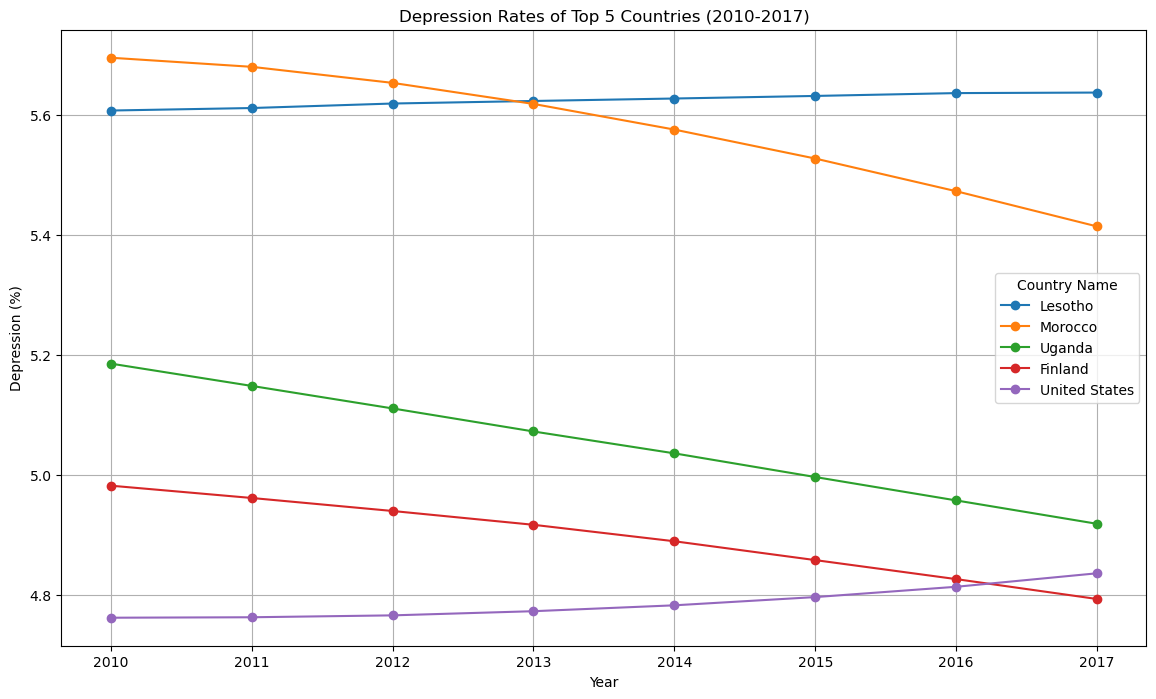

In [32]:
plt.figure(figsize=(14, 8))
for country in Top_Depression_pivot_df.columns:
    plt.plot(Top_Depression_pivot_df.index, Top_Depression_pivot_df[country], marker='o', label=country)

plt.title('Depression Rates of Top 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Depression (%)')
plt.xticks(Top_Depression_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()

plt.savefig("Output_PNG/Top_Depression_Line.png")

plt.show()

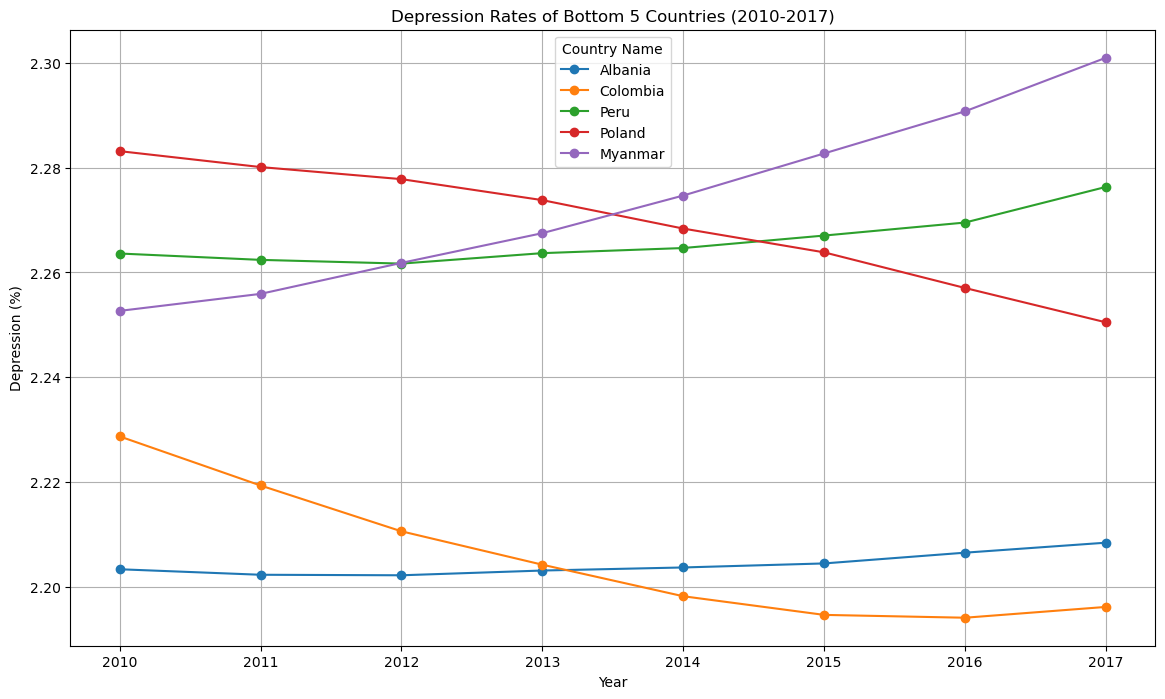

In [33]:
plt.figure(figsize=(14, 8))
for country in Bottom_Depression_pivot_df.columns:
    plt.plot(Bottom_Depression_pivot_df.index, Bottom_Depression_pivot_df[country], marker='o', label=country)

plt.title('Depression Rates of Bottom 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Depression (%)')
plt.xticks(Bottom_Depression_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()

plt.savefig("Output_PNG/Bottom_Depression_Line.png")

plt.show()

In [34]:
Anxiety_Rate_by_Country = Macro_Disorder_ext_df[['Country Name', 'Year', 'Anxiety disorders (%)']]
Anxiety_pivot_df = Anxiety_Rate_by_Country.pivot(index="Year", columns="Country Name", values="Anxiety disorders (%)")
Top_Anxiety_pivot_df = Anxiety_pivot_df[["New Zealand", "Norway", "United States", "France", "Australia"]]
Bottom_Anxiety_pivot_df = Anxiety_pivot_df[["Colombia", "Tajikistan", "Mongolia", "Uzbekistan", "Turkmenistan"]]

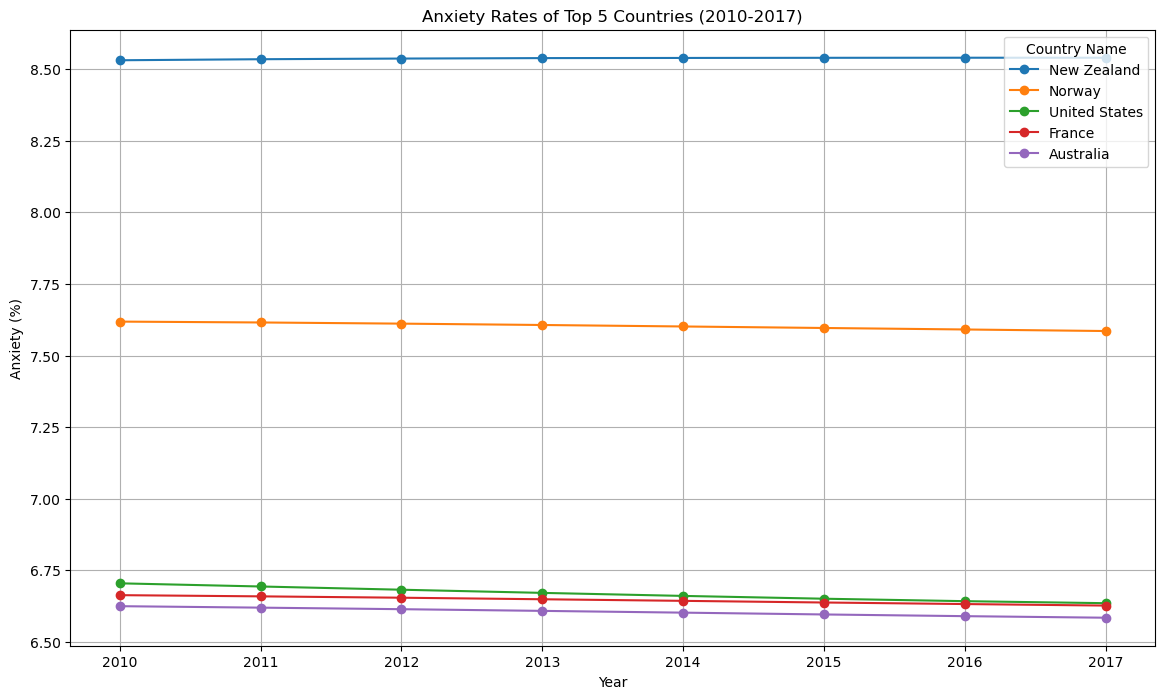

In [35]:
plt.figure(figsize=(14, 8))
for country in Top_Anxiety_pivot_df.columns:
    plt.plot(Top_Anxiety_pivot_df.index, Top_Anxiety_pivot_df[country], marker='o', label=country)
plt.title('Anxiety Rates of Top 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Anxiety (%)')
plt.xticks(Top_Anxiety_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Top_Anxiety_Line.png")
plt.show()

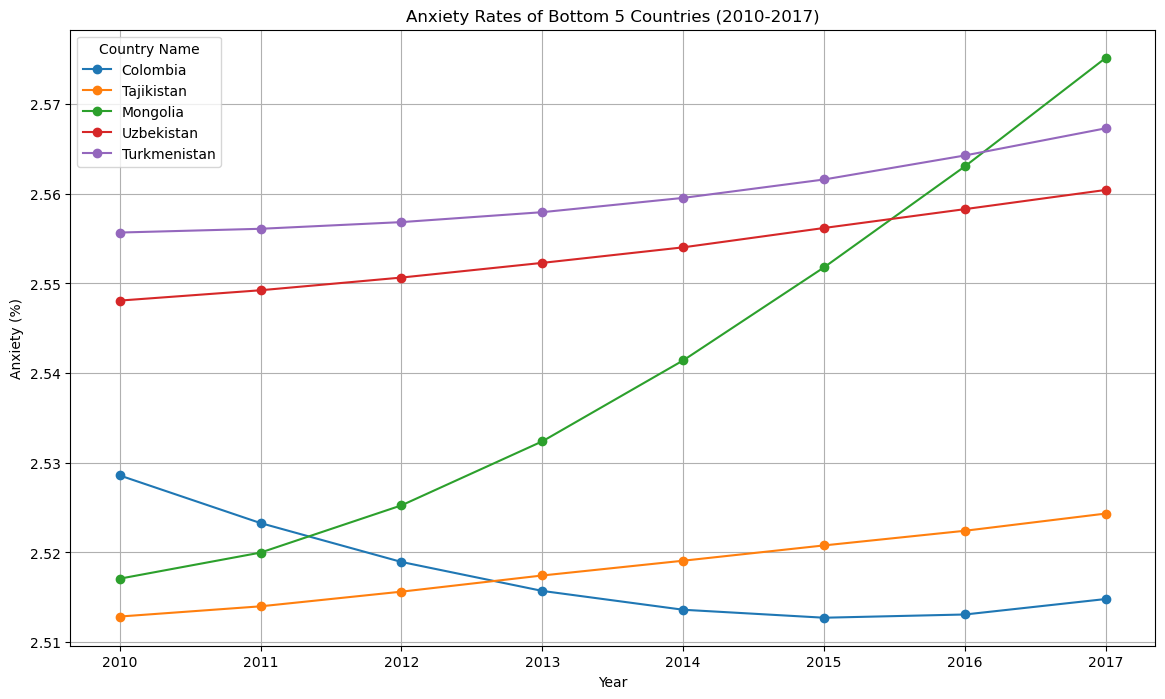

In [36]:
plt.figure(figsize=(14, 8))
for country in Bottom_Anxiety_pivot_df.columns:
    plt.plot(Bottom_Anxiety_pivot_df.index, Bottom_Anxiety_pivot_df[country], marker='o', label=country)
plt.title('Anxiety Rates of Bottom 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Anxiety (%)')
plt.xticks(Bottom_Anxiety_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Bottom_Anxiety_Line.png")
plt.show()

In [37]:
Drug_Rate_by_Country = Macro_Disorder_ext_df[['Country Name', 'Year', 'Drug use disorders (%)']]
Drug_pivot_df = Drug_Rate_by_Country.pivot(index="Year", columns="Country Name", values="Drug use disorders (%)")
Top_Drug_pivot_df = Drug_pivot_df[["United States", "United Arab Emirates", "Afghanistan", "Libya", "Canada"]]
Bottom_Drug_pivot_df = Drug_pivot_df[["Burkina Faso", "Bosnia and Herzegovina", "Mali", "Guinea", "Chad"]]

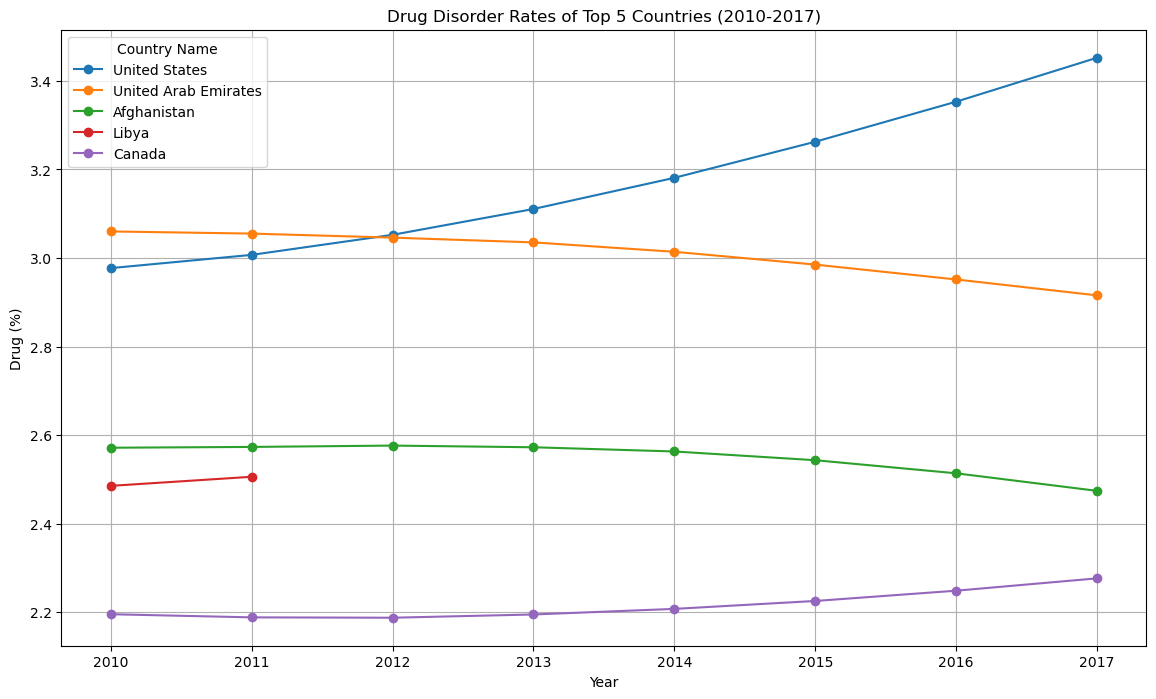

In [38]:
plt.figure(figsize=(14, 8))
for country in Top_Drug_pivot_df.columns:
    plt.plot(Top_Drug_pivot_df.index, Top_Drug_pivot_df[country], marker='o', label=country)
plt.title('Drug Disorder Rates of Top 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Drug (%)')
plt.xticks(Top_Drug_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Top_Drug_Line.png")
plt.show()


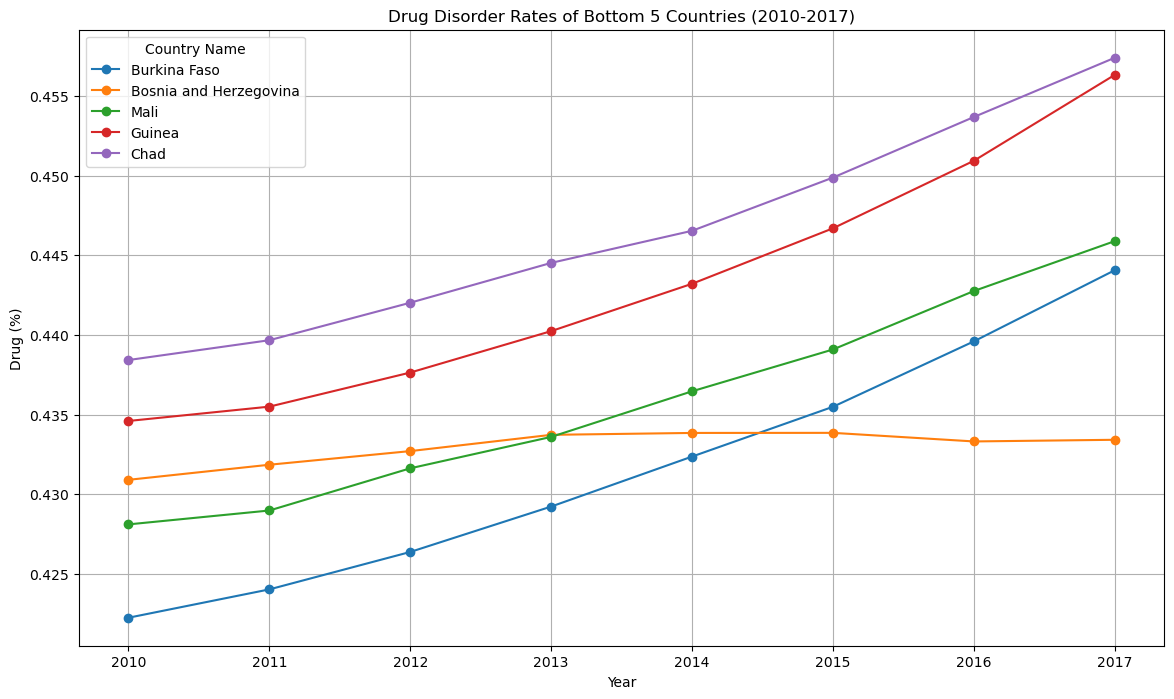

In [39]:
plt.figure(figsize=(14, 8))
for country in Bottom_Drug_pivot_df.columns:
    plt.plot(Bottom_Drug_pivot_df.index, Bottom_Drug_pivot_df[country], marker='o', label=country)
plt.title('Drug Disorder Rates of Bottom 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Drug (%)')
plt.xticks(Bottom_Drug_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Bottom_Drug_Line.png")
plt.show()


In [40]:
Alcohol_Rate_by_Country = Macro_Disorder_ext_df[['Country Name', 'Year', 'Alcohol use disorders (%)']]
Alcohol_pivot_df = Alcohol_Rate_by_Country.pivot(index="Year", columns="Country Name", values="Alcohol use disorders (%)")
Top_Alcohol_pivot_df = Alcohol_pivot_df[["Belarus", "Estonia", "Ukraine", "Lithuania", "Latvia"]]
Bottom_Alcohol_pivot_df = Alcohol_pivot_df[["Italy", "Israel", "Japan", "Morocco", "Malaysia"]]

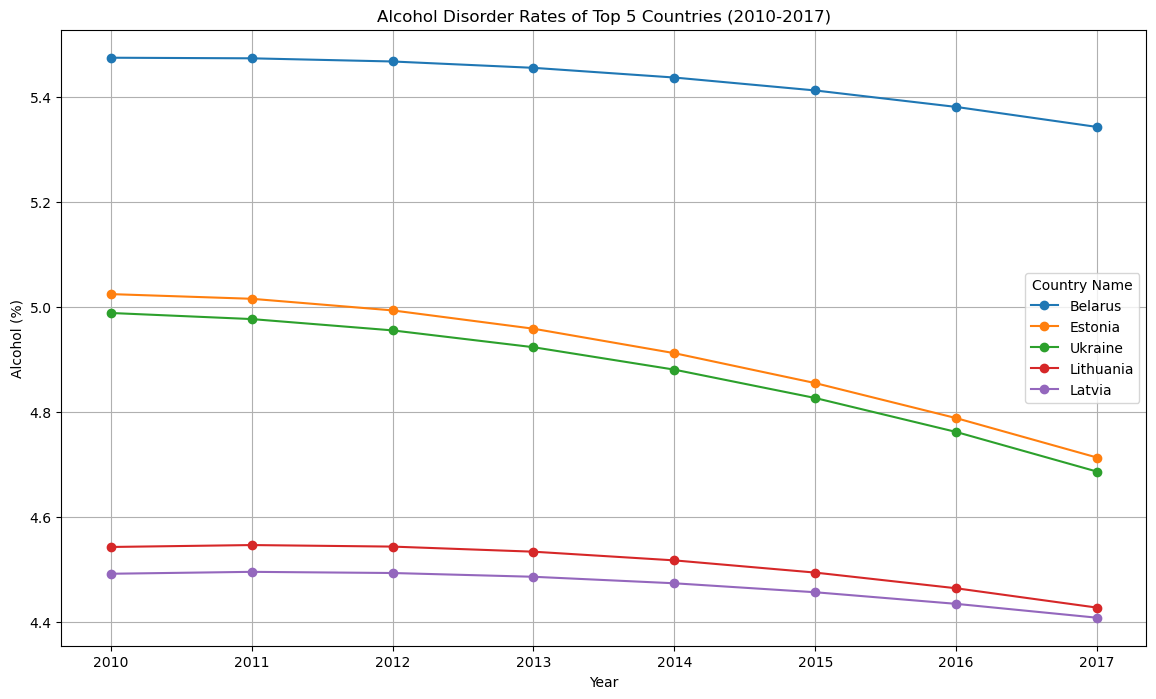

In [41]:
plt.figure(figsize=(14, 8))
for country in Top_Alcohol_pivot_df.columns:
    plt.plot(Top_Alcohol_pivot_df.index, Top_Alcohol_pivot_df[country], marker='o', label=country)
plt.title('Alcohol Disorder Rates of Top 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Alcohol (%)')
plt.xticks(Top_Alcohol_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Top_Alcohol_Line.png")
plt.show()

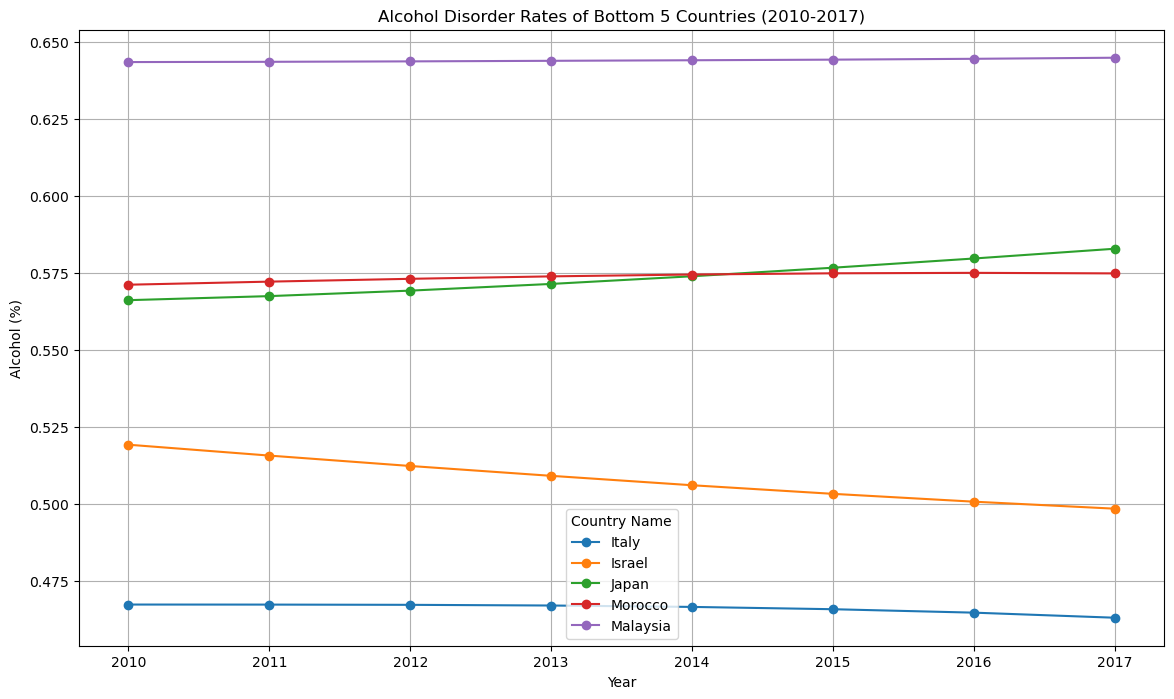

In [42]:
plt.figure(figsize=(14, 8))
for country in Bottom_Alcohol_pivot_df.columns:
    plt.plot(Bottom_Alcohol_pivot_df.index, Bottom_Alcohol_pivot_df[country], marker='o', label=country)
plt.title('Alcohol Disorder Rates of Bottom 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Alcohol (%)')
plt.xticks(Bottom_Alcohol_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Bottom_Alcohol_Line.png")
plt.show()

In [43]:
Eating_Rate_by_Country = Macro_Disorder_ext_df[['Country Name', 'Year', 'Eating disorders (%)']]
Eating_pivot_df = Eating_Rate_by_Country.pivot(index="Year", columns="Country Name", values="Eating disorders (%)")
Top_Eating_pivot_df = Eating_pivot_df[["Australia", "Luxembourg", "Spain", "Austria", "New Zealand"]]
Bottom_Eating_pivot_df = Eating_pivot_df[["Liberia", "Central African Republic", "Solomon Islands", "Niger", "Malawi"]]

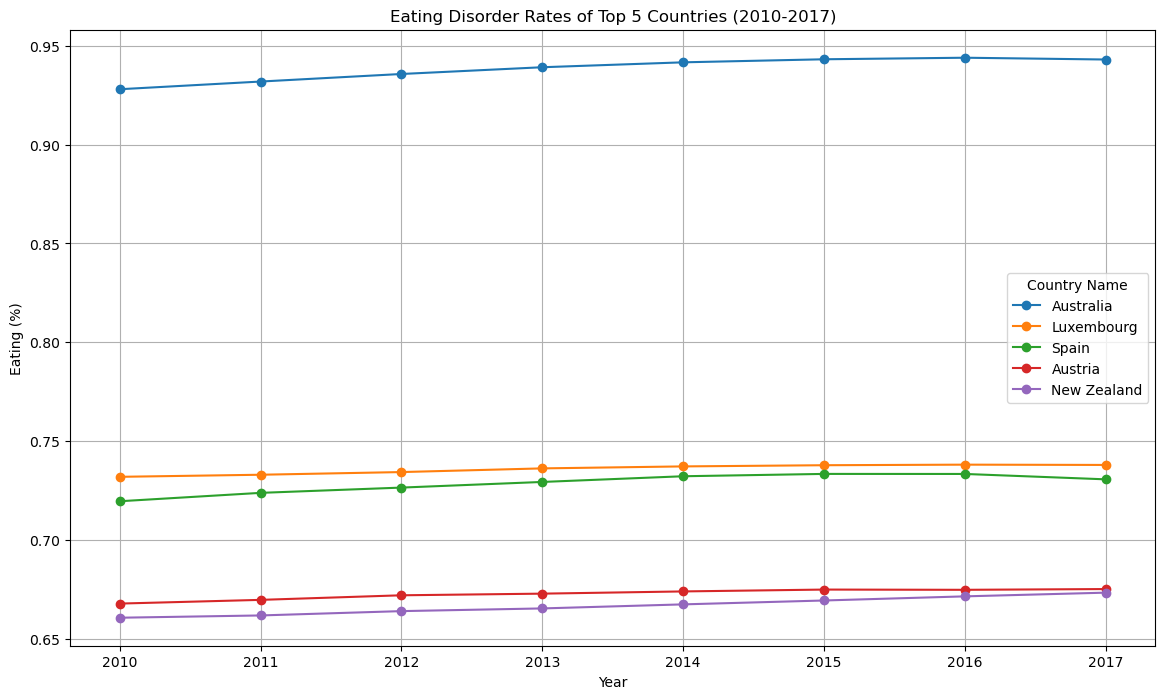

In [44]:
plt.figure(figsize=(14, 8))
for country in Top_Eating_pivot_df.columns:
    plt.plot(Top_Eating_pivot_df.index, Top_Eating_pivot_df[country], marker='o', label=country)
plt.title('Eating Disorder Rates of Top 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Eating (%)')
plt.xticks(Top_Eating_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Top_Eating_Line.png")
plt.show()

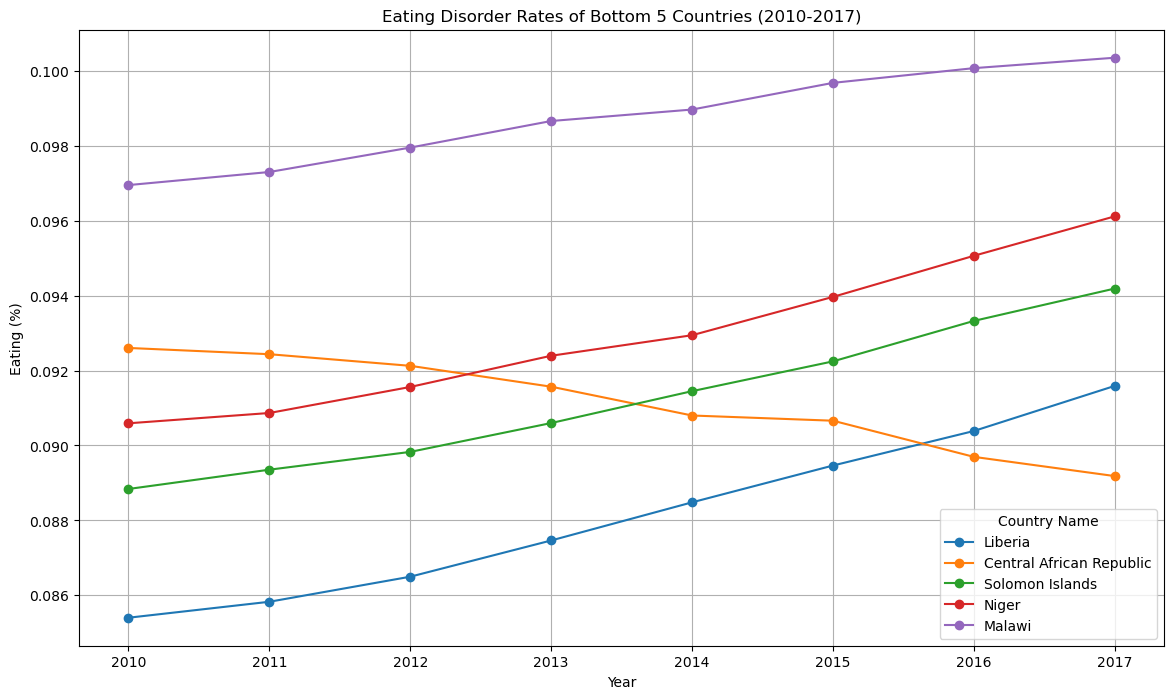

In [45]:
plt.figure(figsize=(14, 8))
for country in Bottom_Eating_pivot_df.columns:
    plt.plot(Bottom_Eating_pivot_df.index, Bottom_Eating_pivot_df[country], marker='o', label=country)
plt.title('Eating Disorder Rates of Bottom 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Eating (%)')
plt.xticks(Bottom_Eating_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Bottom_Eating_Line.png")
plt.show()

In [46]:
Bipolar_Rate_by_Country = Macro_Disorder_ext_df[['Country Name', 'Year', 'Bipolar disorder (%)']]
Bipolar_pivot_df = Bipolar_Rate_by_Country.pivot(index="Year", columns="Country Name", values="Bipolar disorder (%)")
Top_Bipolar_pivot_df = Bipolar_pivot_df[["Netherlands", "Australia", "New Zealand", "United States", "China"]]
Bottom_Bipolar_pivot_df = Bipolar_pivot_df[["Central African Republic", "Malawi", "Mozambique", "Zimbabwe", "Uganda"]]

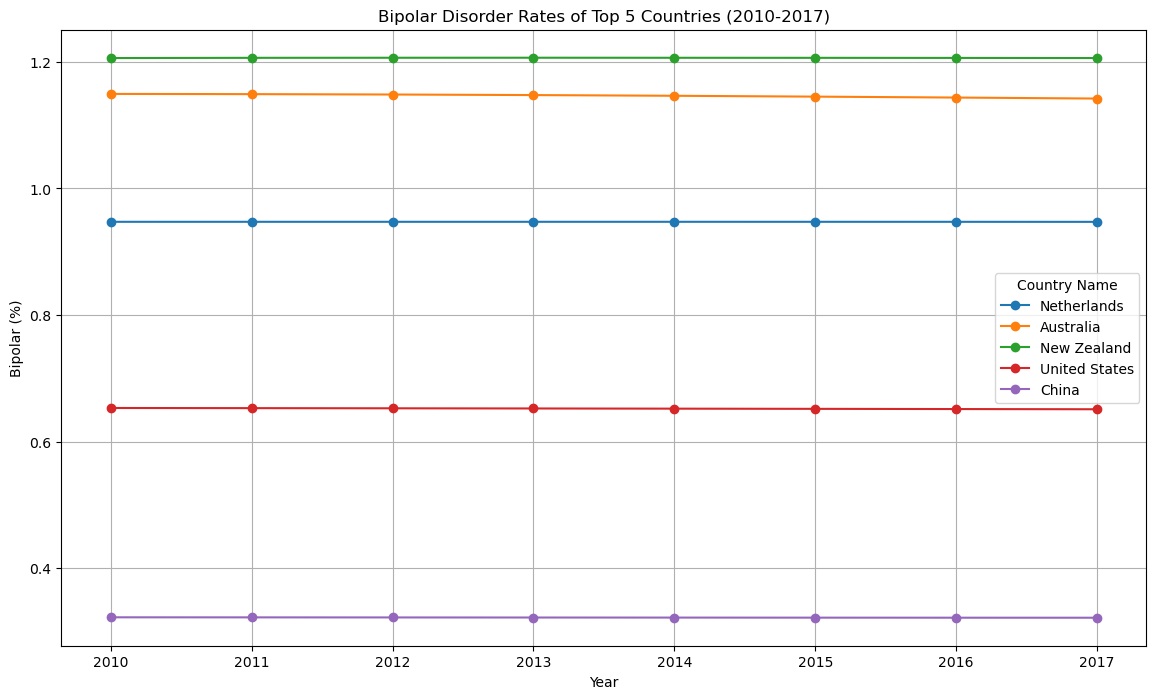

In [47]:
plt.figure(figsize=(14, 8))
for country in Top_Bipolar_pivot_df.columns:
    plt.plot(Top_Bipolar_pivot_df.index, Top_Bipolar_pivot_df[country], marker='o', label=country)
plt.title('Bipolar Disorder Rates of Top 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Bipolar (%)')
plt.xticks(Top_Bipolar_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Top_Bipolar_Line.png")
plt.show()

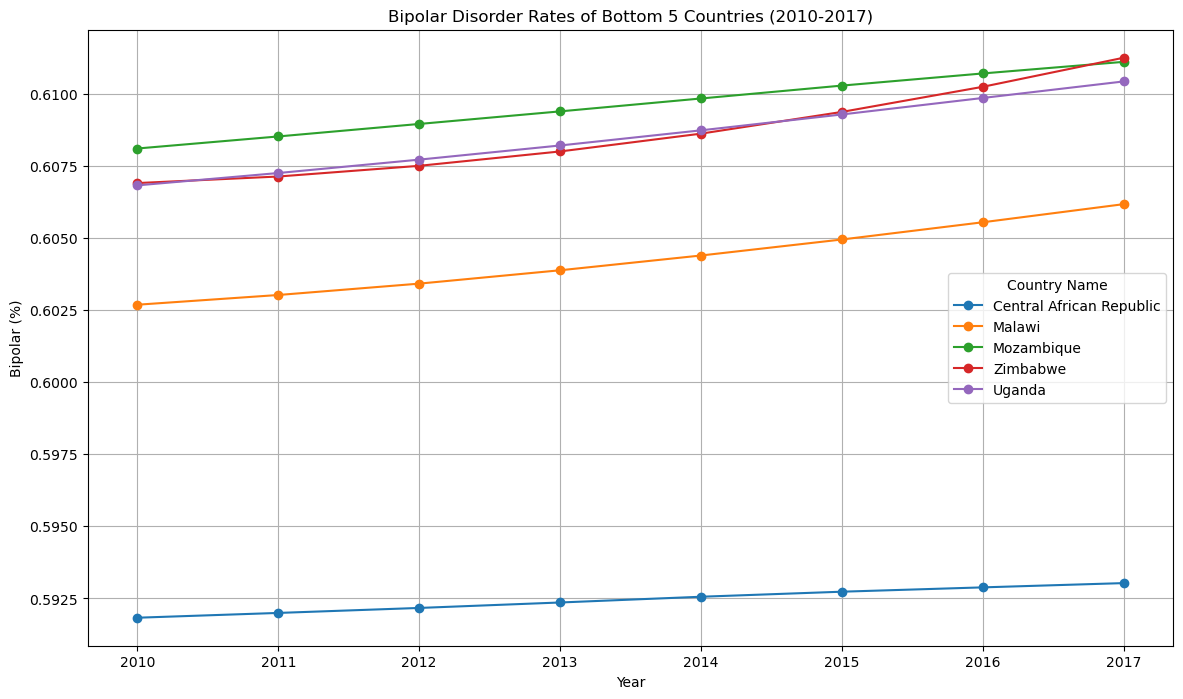

In [48]:
plt.figure(figsize=(14, 8))
for country in Bottom_Bipolar_pivot_df.columns:
    plt.plot(Bottom_Bipolar_pivot_df.index, Bottom_Bipolar_pivot_df[country], marker='o', label=country)
plt.title('Bipolar Disorder Rates of Bottom 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Bipolar (%)')
plt.xticks(Bottom_Bipolar_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Bottom_Bipolar_Line.png")
plt.show()

In [49]:
Schizophrenia_Rate_by_Country = Macro_Disorder_ext_df[['Country Name', 'Year', 'Schizophrenia (%)']]
Schizophrenia_pivot_df = Schizophrenia_Rate_by_Country.pivot(index="Year", columns="Country Name", values="Schizophrenia (%)")
Top_Schizophrenia_pivot_df = Schizophrenia_pivot_df[["New Zealand", "Australia", "Brazil", "United Kingdom", "Paraguay"]]
Bottom_Schizophrenia_pivot_df = Schizophrenia_pivot_df[["China", "Papua New Guinea", "Vanuatu", "Solomon Islands", "Fiji"]]

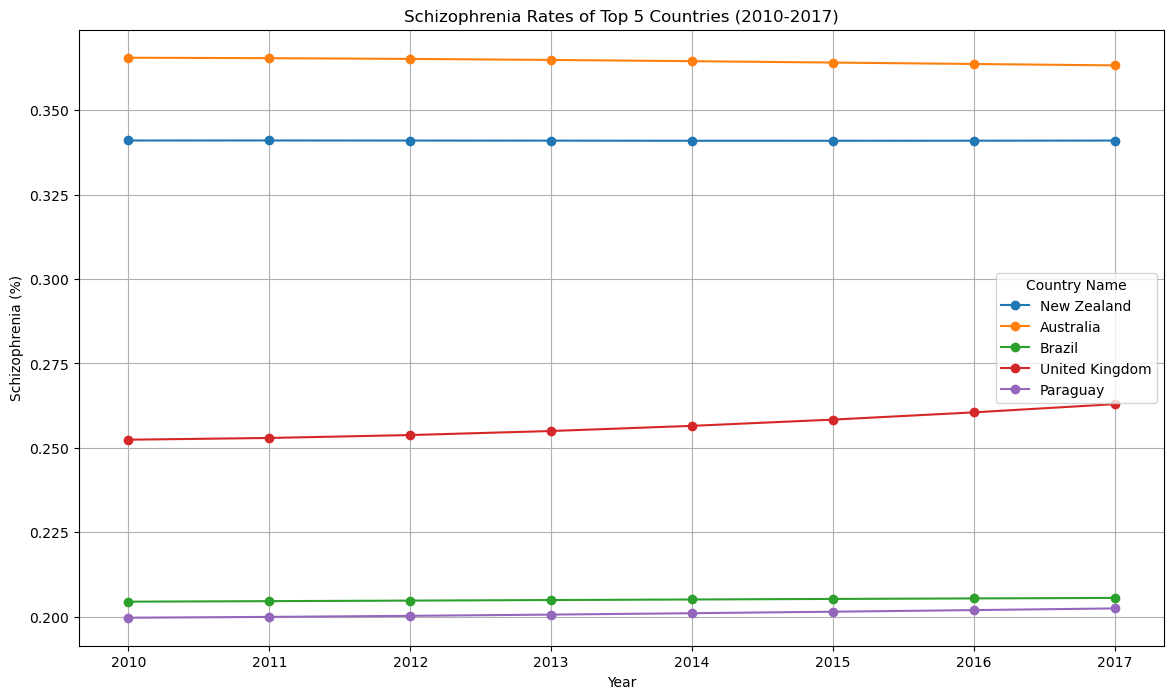

In [50]:
plt.figure(figsize=(14, 8))
for country in Top_Schizophrenia_pivot_df.columns:
    plt.plot(Top_Schizophrenia_pivot_df.index, Top_Schizophrenia_pivot_df[country], marker='o', label=country)
plt.title('Schizophrenia Rates of Top 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Schizophrenia (%)')
plt.xticks(Top_Schizophrenia_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Top_Schizophrenia_Line.png")
plt.show()

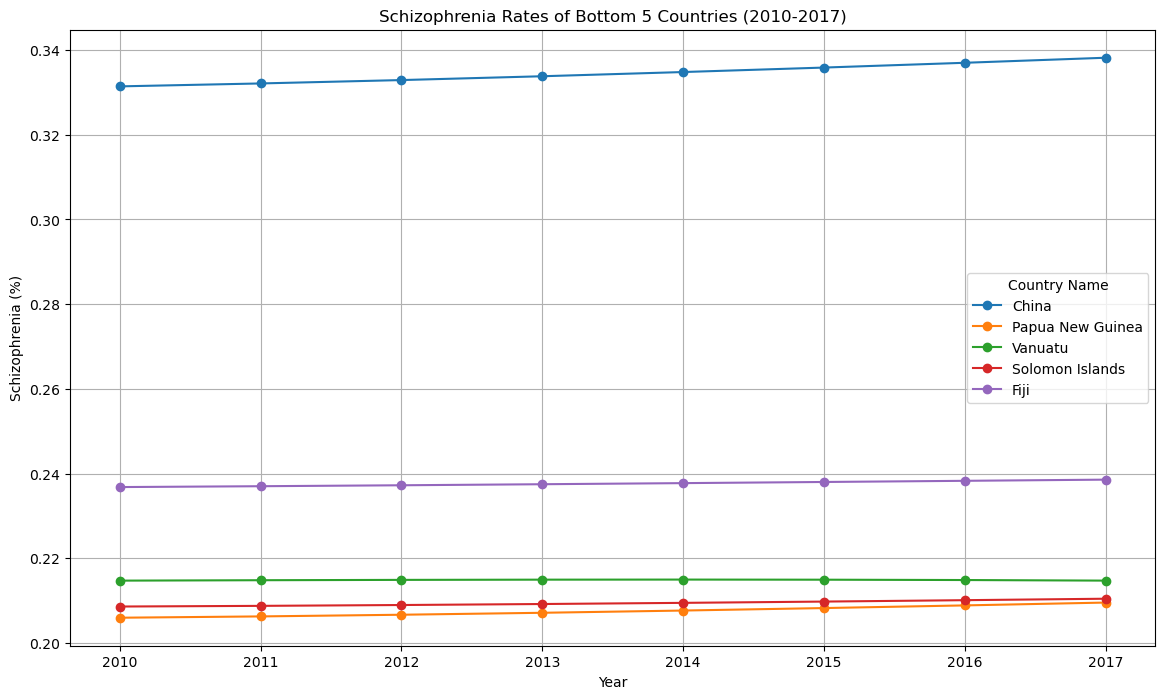

In [51]:
plt.figure(figsize=(14, 8))
for country in Bottom_Schizophrenia_pivot_df.columns:
    plt.plot(Bottom_Schizophrenia_pivot_df.index, Bottom_Schizophrenia_pivot_df[country], marker='o', label=country)
plt.title('Schizophrenia Rates of Bottom 5 Countries (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Schizophrenia (%)')
plt.xticks(Bottom_Schizophrenia_pivot_df.index)
plt.legend(title='Country Name')
plt.grid()
plt.savefig("Output_PNG/Bottom_Schizophrenia_Line.png")
plt.show()

### Health Expenditure Scatters & Linear Regressions

<Axes: xlabel='Percentage GDP Health Expenditure', ylabel='Drug use disorders (%)'>

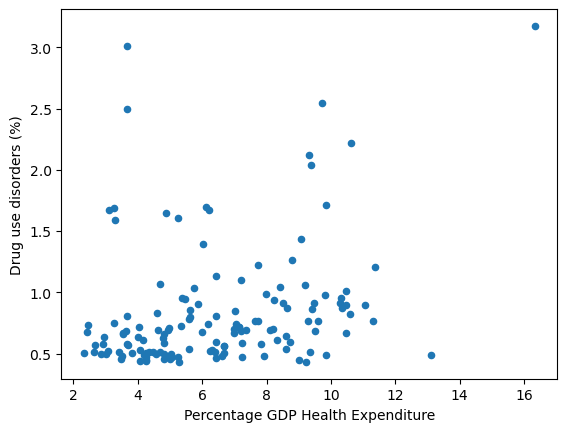

In [52]:
HealthExp_Drugs = Macro_Disorder_df[['Country Name', 'Percentage GDP Health Expenditure', 'Drug use disorders (%)']]
HealthExp_Drugs = HealthExp_Drugs.groupby("Country Name").mean()
HealthExp_Drugs.plot(kind="scatter", x = "Percentage GDP Health Expenditure", y = "Drug use disorders (%)")

The r-squared is: 0.08197189917060942


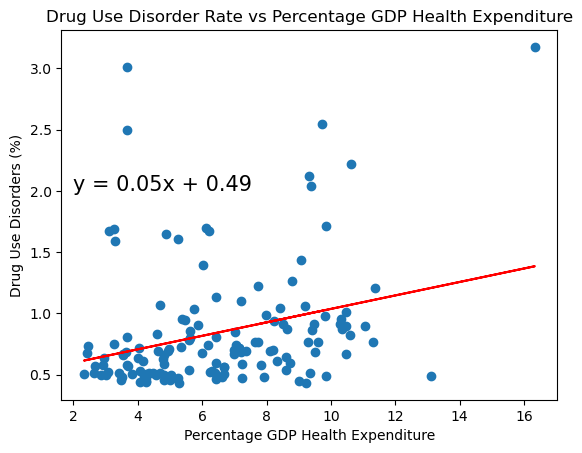

In [53]:
x_values = HealthExp_Drugs['Percentage GDP Health Expenditure']
y_values = HealthExp_Drugs['Drug use disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2,2), fontsize=15, color="black")
plt.xlabel("Percentage GDP Health Expenditure")
plt.ylabel("Drug Use Disorders (%)")
plt.title("Drug Use Disorder Rate vs Percentage GDP Health Expenditure")
print(f"The r-squared is: {rvalue**2}")
plt.show()

<Axes: xlabel='Percentage GDP Health Expenditure', ylabel='Depression (%)'>

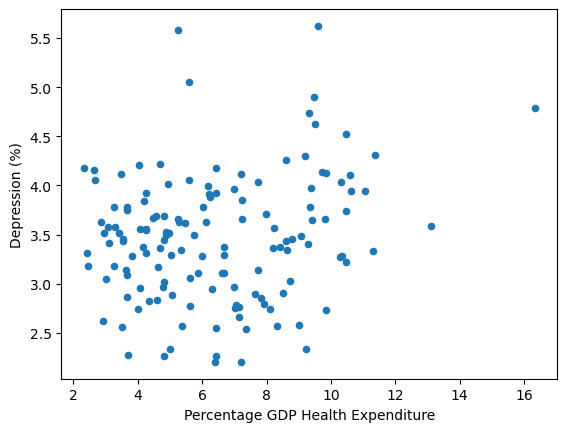

In [54]:
HealthExp_Depression = Macro_Disorder_df[['Country Name', 'Percentage GDP Health Expenditure', 'Depression (%)']]
HealthExp_Depression = HealthExp_Depression.groupby("Country Name").mean()
HealthExp_Depression.plot(kind="scatter", x = "Percentage GDP Health Expenditure", y = "Depression (%)")

The r-squared is: 0.04043608473156957


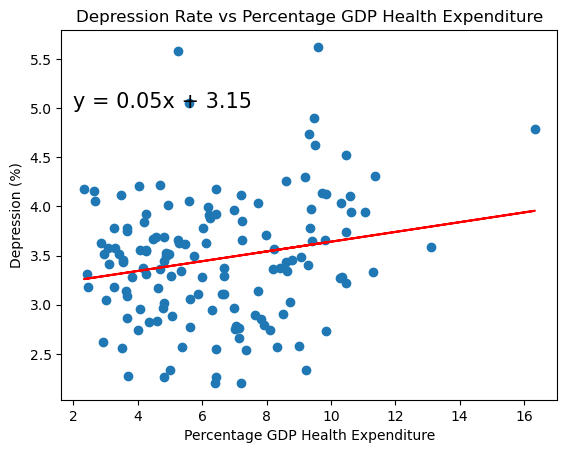

In [55]:
x_values = HealthExp_Depression['Percentage GDP Health Expenditure']
y_values = HealthExp_Depression['Depression (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2,5), fontsize=15, color="black")
plt.xlabel("Percentage GDP Health Expenditure")
plt.ylabel("Depression (%)")
plt.title("Depression Rate vs Percentage GDP Health Expenditure")
print(f"The r-squared is: {rvalue**2}")
plt.show()

<Axes: xlabel='Percentage GDP Health Expenditure', ylabel='Eating disorders (%)'>

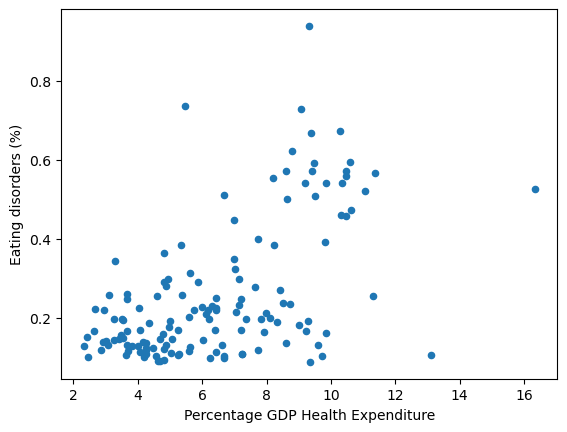

In [56]:
HealthExp_Eat = Macro_Disorder_df[['Country Name', 'Percentage GDP Health Expenditure', 'Eating disorders (%)']]
HealthExp_Eat = HealthExp_Eat.groupby("Country Name").mean()
HealthExp_Eat.plot(kind="scatter", x = "Percentage GDP Health Expenditure", y = "Eating disorders (%)")

The r-squared is: 0.31399644901081714


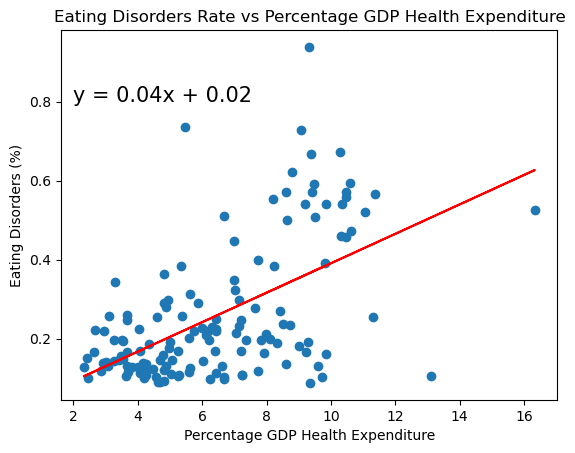

In [57]:
x_values = HealthExp_Eat['Percentage GDP Health Expenditure']
y_values = HealthExp_Eat['Eating disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2,0.8), fontsize=15, color="black")
plt.xlabel("Percentage GDP Health Expenditure")
plt.ylabel("Eating Disorders (%)")
plt.title("Eating Disorders Rate vs Percentage GDP Health Expenditure")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_PNG/Eating_vs_HealthExpGDP.png")
plt.show()

The r-squared is: 0.020316399693936633


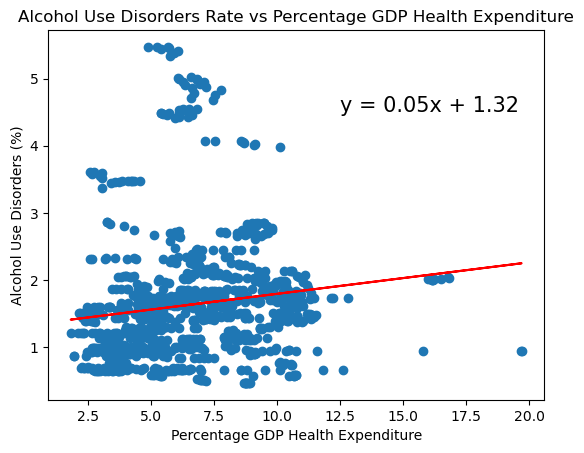

In [58]:
x_values = Macro_Disorder_df['Percentage GDP Health Expenditure']
y_values = Macro_Disorder_df['Alcohol use disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (12.5,4.5), fontsize=15, color="black")
plt.xlabel("Percentage GDP Health Expenditure")
plt.ylabel("Alcohol Use Disorders (%)")
plt.title("Alcohol Use Disorders Rate vs Percentage GDP Health Expenditure")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.20522750017817143


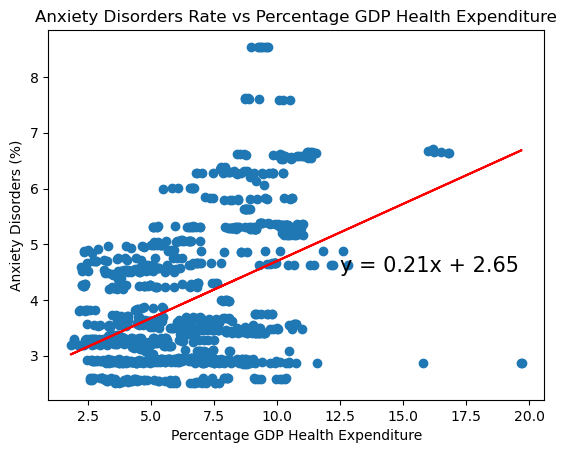

In [59]:
x_values = Macro_Disorder_df['Percentage GDP Health Expenditure']
y_values = Macro_Disorder_df['Anxiety disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (12.5,4.5), fontsize=15, color="black")
plt.xlabel("Percentage GDP Health Expenditure")
plt.ylabel("Anxiety Disorders (%)")
plt.title("Anxiety Disorders Rate vs Percentage GDP Health Expenditure")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_PNG/Anxiety_vs_HealthExpGDP.png")
plt.show()

The r-squared is: 0.1505185321838911


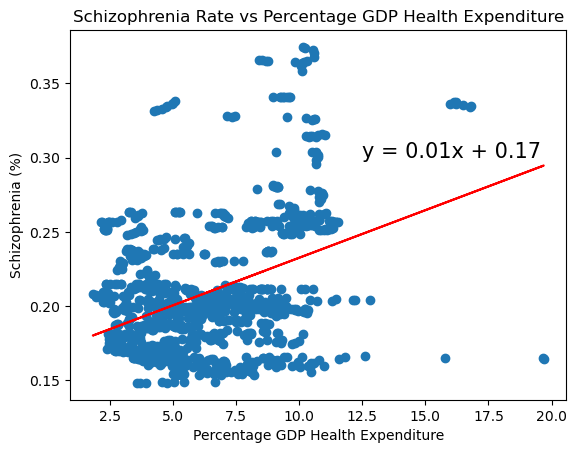

In [60]:
x_values = Macro_Disorder_df['Percentage GDP Health Expenditure']
y_values = Macro_Disorder_df['Schizophrenia (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (12.5,0.3), fontsize=15, color="black")
plt.xlabel("Percentage GDP Health Expenditure")
plt.ylabel("Schizophrenia (%)")
plt.title("Schizophrenia Rate vs Percentage GDP Health Expenditure")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.21612929875854656


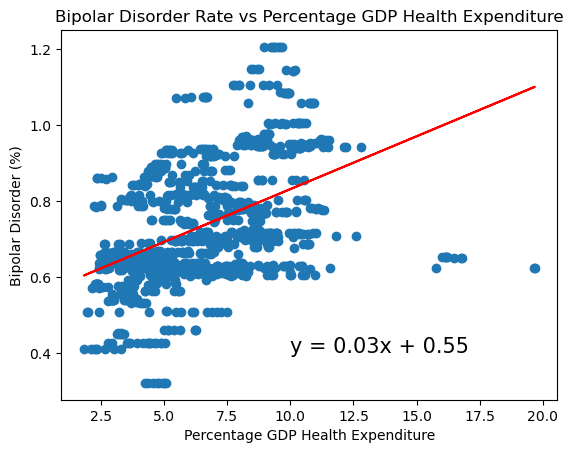

In [61]:
x_values = Macro_Disorder_df['Percentage GDP Health Expenditure']
y_values = Macro_Disorder_df['Bipolar disorder (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Percentage GDP Health Expenditure")
plt.ylabel("Bipolar Disorder (%)")
plt.title("Bipolar Disorder Rate vs Percentage GDP Health Expenditure")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_PNG/Bipolar_vs_HealthExpGDP.png")
plt.show()

### GDP to Disorder Rates

The r-squared is: 0.06405812326980583


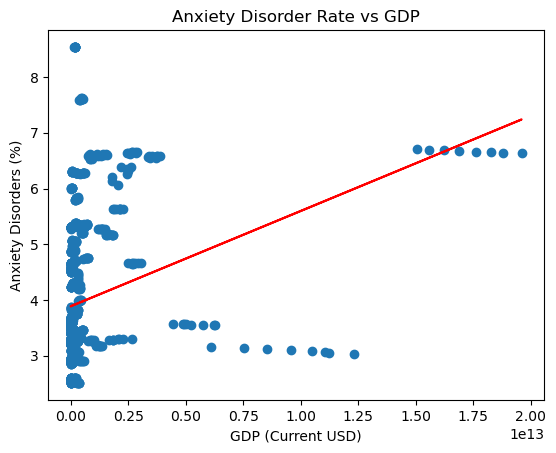

In [101]:
## Anxiety Disorders vs GDP
x_values = Macro_Disorder_ext_df['GDP (Current USD)']
y_values = Macro_Disorder_ext_df['Anxiety disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("GDP (Current USD)")
plt.ylabel("Anxiety Disorders (%)")
plt.title("Anxiety Disorder Rate vs GDP")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/GDP_vs_Anxiety.png")
plt.show()

The r-squared is: 0.3970154626611946


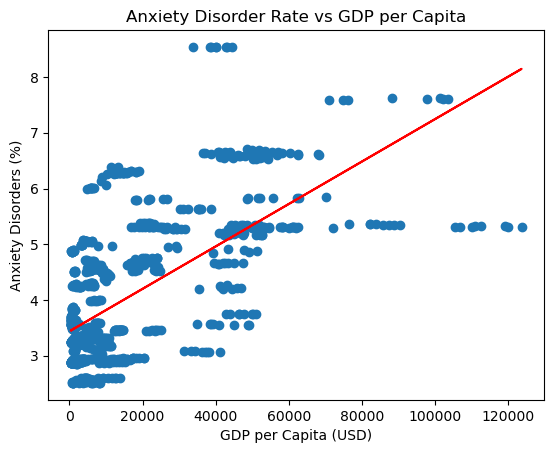

In [109]:
## Anxiety Disorders vs GDP per Capita
x_values = Macro_Disorder_ext_df['GDP per Capita (USD)']
y_values = Macro_Disorder_ext_df['Anxiety disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Anxiety Disorders (%)")
plt.title("Anxiety Disorder Rate vs GDP per Capita")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_PNG/GDPperCap_vs_Anxiety.png")
plt.show()

The r-squared is: 0.061881377906137146


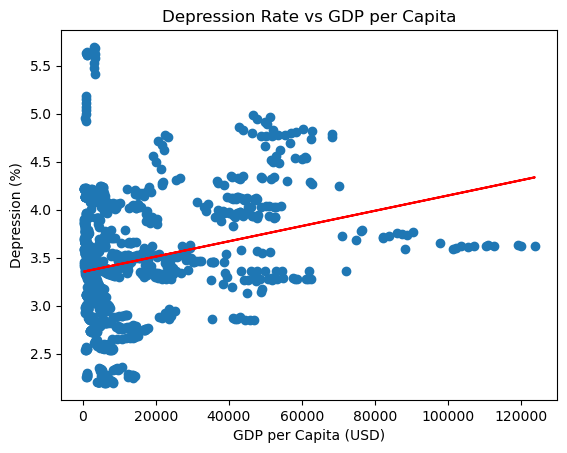

In [105]:
## Depression vs GDP per Capita
x_values = Macro_Disorder_ext_df['GDP per Capita (USD)']
y_values = Macro_Disorder_ext_df['Depression (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Depression (%)")
plt.title("Depression Rate vs GDP per Capita")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/GDPperCap_vs_Depression.png")
plt.show()

### Population Density to Disorder Rates Linear Regerssion

The r-squared is: 0.0077553475589350026


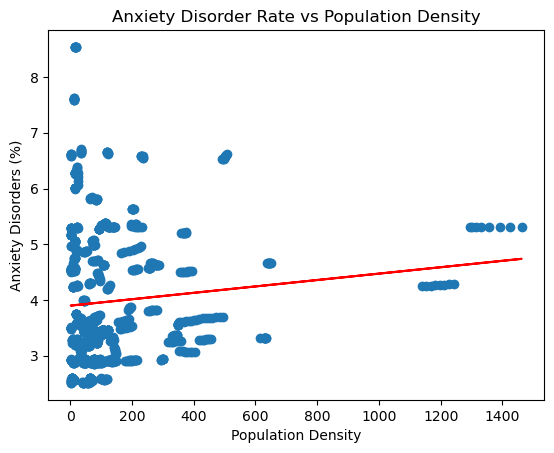

In [110]:
## Anxiety Disorders
x_values = Macro_Disorder_ext_df['Population Density']
y_values = Macro_Disorder_ext_df['Anxiety disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Population Density")
plt.ylabel("Anxiety Disorders (%)")
plt.title("Anxiety Disorder Rate vs Population Density")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/PopDensity_vs_Anxiety.png")
plt.show()

### Life Expectancy to Disorder Rates

The r-squared is: 0.2935695107061834


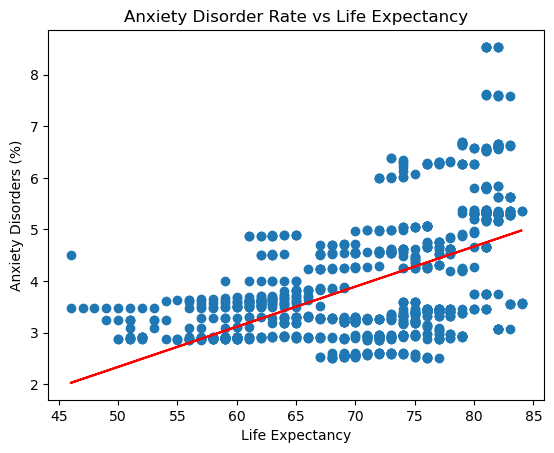

In [112]:
## Anxiety Disorders
x_values = Macro_Disorder_ext_df['Life Expectancy']
y_values = Macro_Disorder_ext_df['Anxiety disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Life Expectancy")
plt.ylabel("Anxiety Disorders (%)")
plt.title("Anxiety Disorder Rate vs Life Expectancy")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_PNG/LifeExp_vs_Anxiety.png")
plt.show()

### Psychologists to Disorder Rates Linear Regression

The r-squared is: 0.004459724202107075


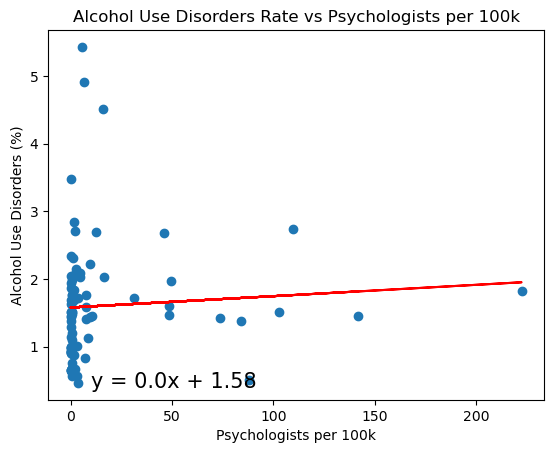

In [69]:
## Alcohol Use Disorders
x_values = Micro_Psychologists['Psychologists per 100k']
y_values = Micro_Psychologists['Alcohol use disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Psychologists per 100k")
plt.ylabel("Alcohol Use Disorders (%)")
plt.title("Alcohol Use Disorders Rate vs Psychologists per 100k")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/Psychologists_vs_Alcohol.png")
plt.show()

The r-squared is: 0.036189746691916366


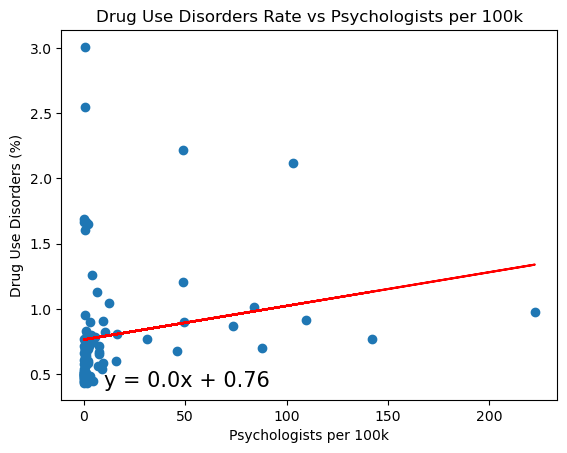

In [68]:
## Drug Use Disorders
x_values = Micro_Psychologists['Psychologists per 100k']
y_values = Micro_Psychologists['Drug use disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Psychologists per 100k")
plt.ylabel("Drug Use Disorders (%)")
plt.title("Drug Use Disorders Rate vs Psychologists per 100k")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/Psychologists_vs_Drugs.png")
plt.show()

The r-squared is: 0.3197729878824758


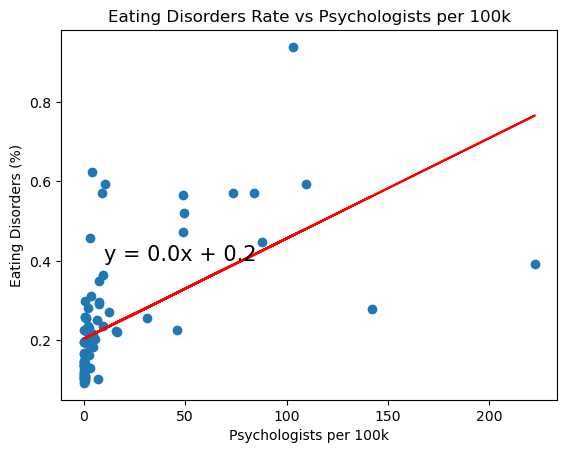

In [67]:
## Eating Disorders
x_values = Micro_Psychologists['Psychologists per 100k']
y_values = Micro_Psychologists['Eating disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Psychologists per 100k")
plt.ylabel("Eating Disorders (%)")
plt.title("Eating Disorders Rate vs Psychologists per 100k")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output_PNG/Psychologists_vs_Eating.png")
plt.show()

The r-squared is: 0.16615465790260495


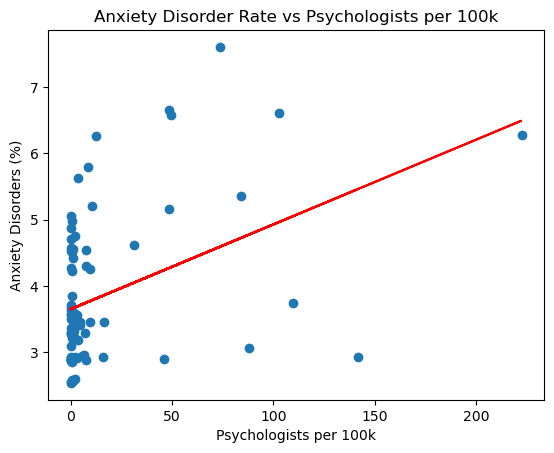

In [63]:
## Anxiety Disorders
x_values = Micro_Psychologists['Psychologists per 100k']
y_values = Micro_Psychologists['Anxiety disorders (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Psychologists per 100k")
plt.ylabel("Anxiety Disorders (%)")
plt.title("Anxiety Disorder Rate vs Psychologists per 100k")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/Psychologists_vs_Anxiety.png")
plt.show()

The r-squared is: 0.04875718348774065


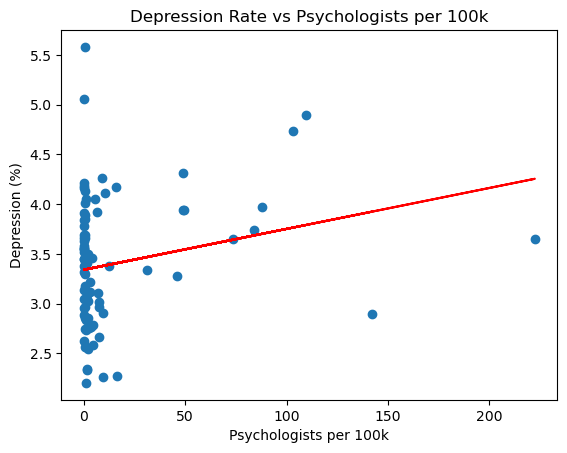

In [64]:
## Depression
x_values = Micro_Psychologists['Psychologists per 100k']
y_values = Micro_Psychologists['Depression (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("Psychologists per 100k")
plt.ylabel("Depression (%)")
plt.title("Depression Rate vs Psychologists per 100k")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/Psychologists_vs_Depression.png")
plt.show()

### GPs to Disorder Rates Linear Regression

The r-squared is: 0.05484806592470551


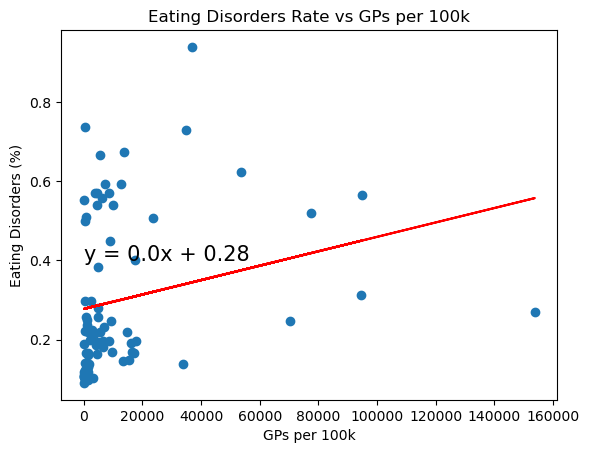

In [108]:
## Eating Disorders
x_values = Micro_GPs['GPs per 100k']
y_values = Micro_GPs['Eating disorders (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 0.4), fontsize=15, color="black")

plt.xlabel("GPs per 100k")
plt.ylabel("Eating Disorders (%)")
plt.title("Eating Disorders Rate vs GPs per 100k")

print(f"The r-squared is: {rvalue**2}")

#plt.savefig("Output_PNG/GPs_vs_Eating.png")
plt.show()


The r-squared is: 0.09500346832536846


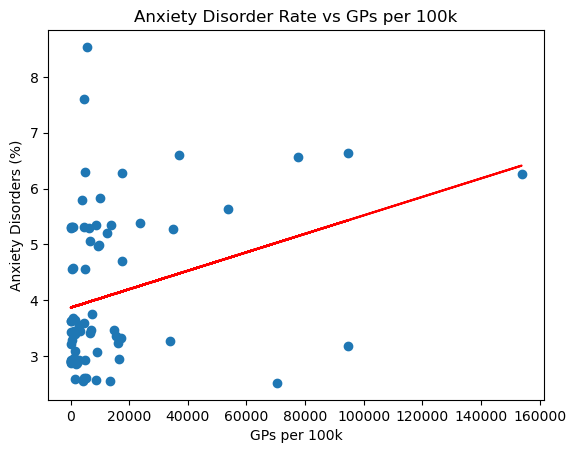

In [106]:
## Anxiety Disorders
x_values = Micro_GPs['GPs per 100k']
y_values = Micro_GPs['Anxiety disorders (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 0.4), fontsize=15, color="black")
plt.xlabel("GPs per 100k")  # X-axis label updated
plt.ylabel("Anxiety Disorders (%)")
plt.title("Anxiety Disorder Rate vs GPs per 100k")  # Title updated
print(f"The r-squared is: {rvalue ** 2}")

# plt.savefig("Output_PNG/GPs_vs_Anxiety.png")
plt.show()


The r-squared is: 0.0006718716959790972


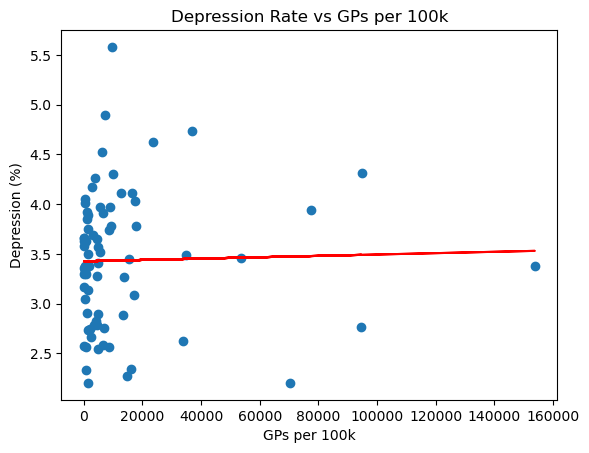

In [100]:
## Depression
x_values = Micro_GPs['GPs per 100k']
y_values = Micro_GPs['Depression (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,0.4), fontsize=15, color="black")
plt.xlabel("GPs per 100k")
plt.ylabel("Depression (%)")
plt.title("Depression Rate vs GPs per 100k")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Output_PNG/GPs_vs_Depression.png")
plt.show()

### Draft Board

In [65]:
Micro_Psychologists.columns

Index(['Year', 'GDP (Current USD)', 'Percentage GDP Health Expenditure',
       'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
       'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)', 'Prevalence in males (%)',
       'Prevalence in females (%)', 'Undernourishment (%)', 'Unemployment (%)',
       'Age Dependency Ratio (%)', 'Population', 'Urban Population',
       'Population Density', 'PM2.5 Air Pollution', 'Life Expectancy',
       'Suicide rate (deaths per 100,000 individuals)',
       'Depressive disorder rates (number suffering per 100,000)',
       'GDP per Capita (USD)', 'Health Expenditure (USD)', 'Schizophrenia (#)',
       'Bipolar disorder (#)', 'Eating disorders (#)', 'Anxiety disorders (#)',
       'Drug use disorders (#)', 'Depression (#)', 'Alcohol use disorders (#)',
       'Psychologists per 100k'],
      dtype='object')

In [66]:
Macro_Disorder_ext_df.loc[Macro_Disorder_ext_df['Year'] == 2010]

,Country Name,Country Code,Year,GDP (Current USD),Percentage GDP Health Expenditure,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),...,"Depressive disorder rates (number suffering per 100,000)",GDP per Capita (USD),Health Expenditure (USD),Schizophrenia (#),Bipolar disorder (#),Eating disorders (#),Anxiety disorders (#),Drug use disorders (#),Depression (#),Alcohol use disorders (#)
0,Afghanistan,AFG,2010,1.585667e+10,8.569672,0.165130,0.705313,0.097327,4.862777,2.571349,...,4053.953769,562.499222,1.358864e+09,46549.605374,198825.421273,27436.162067,1.370801e+06,724854.849075,1.164480e+06,186633.106237
1,Angola,AGO,2010,8.379947e+10,2.695100,0.170158,0.622503,0.156364,3.277828,0.503415,...,4098.150892,3586.663694,2.258479e+09,39756.029912,145442.752551,36533.174233,7.658378e+05,117618.811918,9.708281e+05,324339.980677
2,Albania,ALB,2010,1.192693e+10,6.236677,0.199308,0.703064,0.160337,3.391246,0.500270,...,2106.380192,4094.349686,7.438439e+08,5805.883895,20480.401963,4670.650481,9.878771e+04,14572.970157,6.418382e+04,53557.813679
3,United Arab Emirates,ARE,2010,3.001891e+11,3.878731,0.213138,0.801470,0.260129,4.200126,3.059998,...,2711.270791,35392.260966,1.164352e+10,18077.877074,67978.850034,22063.546085,3.562451e+05,259542.022965,2.426556e+05,65206.328729
4,Argentina,ARG,2010,4.236274e+11,9.445464,0.197541,0.771084,0.381185,6.268718,0.955035,...,3363.831257,10385.964432,4.001358e+10,80573.917941,314513.234931,155479.464568,2.556913e+06,389544.002109,1.487934e+06,750168.175271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Vanuatu,VUT,2010,6.707130e+08,3.526561,0.214731,0.426569,0.104303,3.212105,0.673466,...,3101.896817,2732.551568,2.365310e+07,527.063681,1047.026408,256.014843,7.884208e+03,1653.042501,7.729335e+03,2953.791220
134,Samoa,WSM,2010,6.802609e+08,5.152683,0.234772,0.460375,0.123989,3.255222,0.861347,...,2977.817804,3494.395224,3.505169e+07,457.035348,896.221220,241.371866,6.337006e+03,1676.801432,5.969208e+03,2153.874369
135,South Africa,ZAF,2010,4.173638e+11,7.793582,0.180770,0.635103,0.210795,3.995125,1.042054,...,3578.643830,8059.562798,3.252759e+10,93611.601692,328887.586819,109160.024222,2.068872e+06,539626.840677,1.916016e+06,861483.070923
136,Zambia,ZMB,2010,2.026556e+10,3.974719,0.162712,0.603678,0.129023,3.562279,0.495711,...,3449.247356,1469.361450,8.054991e+08,22441.378972,83259.788923,17794.963120,4.913126e+05,68368.887431,4.823101e+05,224918.993833
